### 2.Analyse exploratoire

In [1]:
pip install functions 

Note: you may need to restart the kernel to use updated packages.


In [6]:
%matplotlib inline
import pandas as pd
import numpy as np
import os
#import math
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn import preprocessing 
from sklearn.manifold import TSNE
from matplotlib.collections import LineCollection
from scipy.cluster.hierarchy import dendrogram
from scipy import stats
from scipy.stats import shapiro, kruskal, jarque_bera, levene
#import plotly.express as px
from ipywidgets import interact
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [7]:
from fonctions import calculModalites, df_object_float

In [8]:
import fonctions as fct

In [10]:
import fonctions_exploration as fct_exp
from fonctions_exploration import visualiser_distribution

In [11]:
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "exploration"

### Importation du dataframe nettoyée

In [12]:
openfoodfacts_cleaned = pd.read_csv('data/fr.openfoodfacts.org.products_cleaned.csv', index_col='code')

In [13]:
openfoodfacts_cleaned.sort_values(by='code')

saturated-fat_100g  energy_100g  fat_100g  \
code                                                         
10                              2.5       1900.0      23.0   
30                              2.5       1768.0      19.0   
31                              2.0       1670.0      15.0   
50                             10.0       1868.0      23.0   
51                             10.0       1896.0      24.0   
...                             ...          ...       ...   
356470049818702                16.3       2284.0      34.4   
356470058088201                10.3       1863.0      17.3   
356470079377001                 2.4       1745.0      19.0   
356470087056301                 2.0       1870.0      15.0   
366111205177802                 9.5       1220.0      24.0   

                 carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  \
code                                                                          
10                             55.0         26.0         1.5            6.0   
30                             56.0         28.0         1.8            5.8   
31                             60.0         34.0         1.5            4.9   
50                             51.0         39.0         1.7            8.0   
51                             50.0         37.0         2.5            8.1   
...                             ...          ...         ...            ...   
356470049818702                51.7         49.2         5.0            5.4   
356470058088201                68.7         55.6         1.8            3.1   
356470079377001                55.0         30.0         1.7            5.5   
356470087056301                70.0         35.0         3.6            6.3   
366111205177802                 3.4          1.9         0.9           15.9   

                 salt_100g  sodium_100g  nutrition-score-fr_100g  \
code                                                               
10                    0.66     0.259843                     12.0   
30                    0.65     0.255906                     13.0   
31                    0.60     0.236220                     12.0   
50                    0.55     0.216535                     22.0   
51                    0.78     0.307087                     22.0   
...                    ...          ...                      ...   
356470049818702       0.15     0.059055                     21.0   
356470058088201       0.42     0.165354                     24.0   
356470079377001       0.78     0.307087                     14.0   
356470087056301       0.75     0.295276                     11.0   
366111205177802       1.70     0.669291                     19.0   

                        pnns_groups_1  \
code                                    
10                      Sugary snacks   
30                      Sugary snacks   
31                      Sugary snacks   
50                      Sugary snacks   
51                      Sugary snacks   
...                               ...   
356470049818702               unknown   
356470058088201         Sugary snacks   
356470079377001         Sugary snacks   
356470087056301  Cereals and potatoes   
366111205177802        Fish Meat Eggs   

                                                     product_name  \
code                                                                
10                                              Madeleines nature   
30                                                  Cakes Raisins   
31                                               Cakes aux Fruits   
50                                         Financiers aux Amandes   
51                                                Fondants Citron   
...                                                           ...   
356470049818702                              Rochers noir praliné   
356470058088201                                 Caramels Chocolat   
356470079377001                         Barre Marbrée au Chocolat   
3564

In [14]:
openfoodfacts_cleaned.shape

(34671, 16)

##### Prendre "code" comme index

In [15]:
openfoodfacts_cleaned.index

Int64Index([     40608754,      87177756,            10,            30,
                       31,            50,            51,           104,
                      227,         23092,
            ...
            9556041612555, 9556041612661, 9556041780612, 9556156040038,
            9556156040182, 9556156046399, 9556417639339, 9556587103869,
            9577283844672,      96068779],
           dtype='int64', name='code', length=34671)

In [16]:
openfoodfacts_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34671 entries, 40608754 to 96068779
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   saturated-fat_100g       34671 non-null  float64
 1   energy_100g              34671 non-null  float64
 2   fat_100g                 34671 non-null  float64
 3   carbohydrates_100g       34671 non-null  float64
 4   sugars_100g              34671 non-null  float64
 5   fiber_100g               34671 non-null  float64
 6   proteins_100g            34671 non-null  float64
 7   salt_100g                34671 non-null  float64
 8   sodium_100g              34671 non-null  float64
 9   nutrition-score-fr_100g  34671 non-null  float64
 10  pnns_groups_1            34671 non-null  object 
 11  product_name             34671 non-null  object 
 12  brands                   34671 non-null  object 
 13  countries_fr             34671 non-null  object 
 14  ingredients_

In [17]:
openfoodfacts_cleaned.dtypes

saturated-fat_100g         float64
energy_100g                float64
fat_100g                   float64
carbohydrates_100g         float64
sugars_100g                float64
fiber_100g                 float64
proteins_100g              float64
salt_100g                  float64
sodium_100g                float64
nutrition-score-fr_100g    float64
pnns_groups_1               object
product_name                object
brands                      object
countries_fr                object
ingredients_text            object
nutrition_grade_fr          object
dtype: object

In [18]:
openfoodfacts_cleaned.columns

Index(['saturated-fat_100g', 'energy_100g', 'fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'nutrition-score-fr_100g', 'pnns_groups_1',
       'product_name', 'brands', 'countries_fr', 'ingredients_text',
       'nutrition_grade_fr'],
      dtype='object')

In [19]:
data_objet, data_float =  df_object_float(openfoodfacts_cleaned)

In [20]:
data_objet.columns

Index(['pnns_groups_1', 'product_name', 'brands', 'countries_fr',
       'ingredients_text', 'nutrition_grade_fr'],
      dtype='object')

In [21]:
data_float.columns

Index(['saturated-fat_100g', 'energy_100g', 'fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'nutrition-score-fr_100g'],
      dtype='object')

nutrition-score-fr_100g : Nutri-Score - Score nutritionnel dérivé du score UK FSA et adapté pour le marché français (formule définie par l'équipe du Professeur Hercberg)

### I : Analyse univariée de nos variables

##### I-1 : Variables catégorielles : 
- 'pnns_groups_1'
- 'product_name', 
- 'brands',
- 'countries_fr',
- 'ingredients_text'
- 'serving_size',
- 'nutrition_grade_fr'

###### I-1-a : Affichage des modalités pour chaque variable

In [22]:
#pnns_groups_1
calculModalites(data_objet,'pnns_groups_1').sort_values(by='Nbre Modalité')

Nbre Modalité
Modalités                             
cereals-and-potatoes                 1
sugary-snacks                      294
fruits-and-vegetables              350
Salty snacks                      1406
Fat and sauces                    1994
Fruits and vegetables             2182
Beverages                         2788
Cereals and potatoes              3616
Fish Meat Eggs                    3625
Milk and dairy products           3837
Composite foods                   4406
unknown                           4519
Sugary snacks                     5653

In [23]:
openfoodfacts_cleaned['pnns_groups_1'] = openfoodfacts_cleaned['pnns_groups_1'].replace('sugary-snacks', 'Sugary snacks')
openfoodfacts_cleaned['pnns_groups_1'] = openfoodfacts_cleaned['pnns_groups_1'].replace('fruits-and-vegetables', 'Fruits and vegetables')

In [24]:
#product_name
#calculModalites(data_objet,'product_name').sort_values(by='Nbre Modalité')
#brands
#calculModalites(data_objet,'brands').sort_values(by='Nbre Modalité')
#countries_fr
#calculModalites(data_objet,'countries_fr').sort_values(by='Nbre Modalité')
#ingredients_text
#calculModalites(data_objet,'ingredients_text').sort_values(by='Nbre Modalité')
#openfoodfacts_cleaned[openfoodfacts_cleaned['pnns_groups_1'] == 'unknown']
#openfoodfacts_cleaned[openfoodfacts_cleaned['pnns_groups_1'] == 'unknown'][data_objet.columns]
#openfoodfacts_cleaned[openfoodfacts_cleaned['pnns_groups_1'] == 'unknown'][data_float.columns]
#nutrition_grade_fr
#calculModalites(data_objet,'nutrition_grade_fr').sort_values(by='Nbre Modalité')
#nutrition-score-fr
#calculModalites(data_float,'nutrition-score-fr_100g').sort_values(by='Nbre Modalité')

- Transformation de la variable numérique 'nutrition-score-fr_100g' en variable catégorielle 'nutrition-grade-fr_1'

In [31]:
openfoodfacts_cleaned.loc[(openfoodfacts_cleaned['nutrition-score-fr_100g'] < 7), 'nutrition-grade-fr_1'] = 'a'
openfoodfacts_cleaned.loc[(openfoodfacts_cleaned['nutrition-score-fr_100g'] >= 7) & (openfoodfacts_cleaned['nutrition-score-fr_100g'] < 14), 'nutrition-grade-fr_1'] = 'b'
openfoodfacts_cleaned.loc[(openfoodfacts_cleaned['nutrition-score-fr_100g'] >=14) & (openfoodfacts_cleaned['nutrition-score-fr_100g'] <21), 'nutrition-grade-fr_1'] = 'c'
openfoodfacts_cleaned.loc[(openfoodfacts_cleaned['nutrition-score-fr_100g'] >=21) & (openfoodfacts_cleaned['nutrition-score-fr_100g'] <28), 'nutrition-grade-fr_1'] = 'd'
openfoodfacts_cleaned.loc[(openfoodfacts_cleaned['nutrition-score-fr_100g'] >=28 ), 'nutrition-grade-fr_1'] = 'e'

In [32]:
openfoodfacts_cleaned.columns

Index(['saturated-fat_100g', 'energy_100g', 'fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'nutrition-score-fr_100g', 'pnns_groups_1',
       'product_name', 'brands', 'countries_fr', 'ingredients_text',
       'nutrition_grade_fr', 'nutrition-grade-fr_1'],
      dtype='object')

In [33]:
#nutrition-score-fr
#calculModalites(openfoodfacts_cleaned,'nutrition-grade-fr_1').sort_values(by='Nbre Modalité')
#calculModalites(openfoodfacts_cleaned,'nutrition-grade-fr_2').sort_values(by='Nbre Modalité')

In [34]:
#openfoodfacts_cleaned.drop(['nutrition-score-fr_100g'], axis=1, inplace=True)

###### I-1:b : Représentation graphique de la répartitions des grades existant dans la variable 'nutrition_grade_fr'
- nutrition_grade_fr : nutrition grade ('a' to 'e'). see https://fr.openfoodfacts.org/nutriscore   

In [35]:
data_objet, data_float =  df_object_float(openfoodfacts_cleaned)


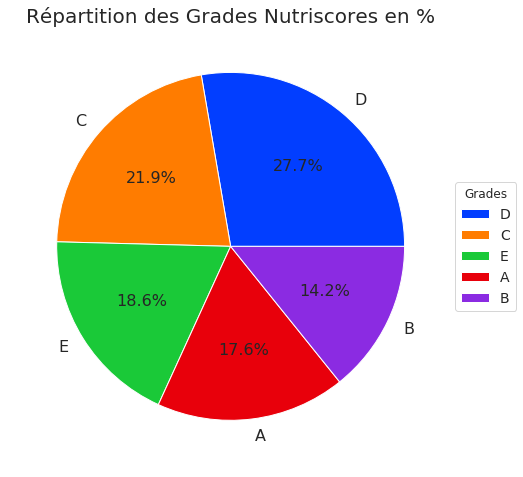

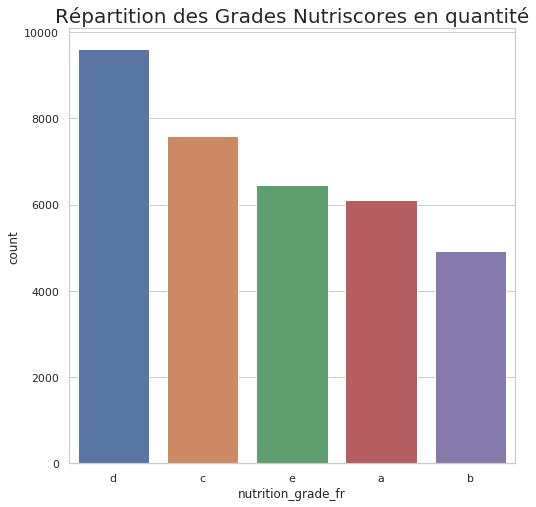

In [36]:
plt.figure(figsize=(8,8))

colors = sns.color_palette('bright')[0:5]
plt.title('Répartition des Grades Nutriscores en %', size=20)
wedges, texts, autotexts = plt.pie(data_objet['nutrition_grade_fr'].value_counts().values, 
        labels = data_objet['nutrition_grade_fr'].value_counts().index.str.upper(),
       autopct='%1.1f%%', textprops={'fontsize': 16 } , colors = colors)


ax = plt.gca()

ax.legend(wedges, data_objet['nutrition_grade_fr'].value_counts().index.str.upper(),
          title="Grades",
          loc="center left",
          fontsize=14,
          bbox_to_anchor=(1, 0, 0.5, 1))
#fct_exp.save_fig("repartition_grades_nutriscores_perc")



plt.figure(figsize=(8,8))

sns.set_theme(style="whitegrid")
sns.countplot(x=data_objet["nutrition_grade_fr"], order=data_objet['nutrition_grade_fr'].value_counts().index)
plt.title('Répartition des Grades Nutriscores en quantité', size=20)
#fct_exp.save_fig("repartition_grades_nutriscores_count")
plt.show()

D'aprés ces graphiques, on peut observer que :
 - Le grade nutriscore B est le moins représenté
 - Les grade D et C sont les plus representés
 - Globalement, la répartition des grades nutritionnelle ne présente une domination d'un grade par rapport aux autres

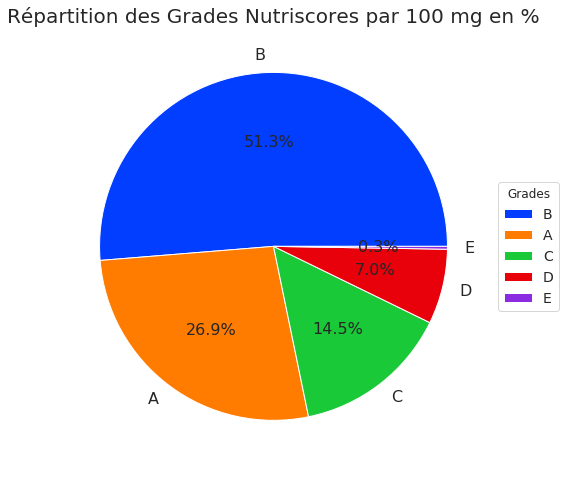

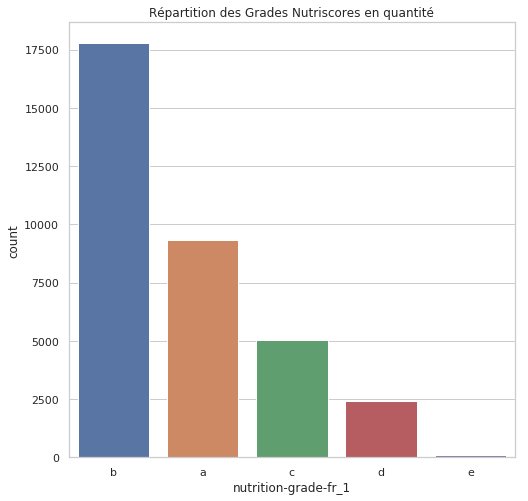

In [37]:
plt.figure(figsize=(8,8))
colors = sns.color_palette('bright')[0:5]
plt.title('Répartition des Grades Nutriscores par 100 mg en %', size=20)
wedges, texts, autotexts = plt.pie(data_objet['nutrition-grade-fr_1'].value_counts().values, 
        labels = data_objet['nutrition-grade-fr_1'].value_counts().index.str.upper(),
       autopct='%1.1f%%', textprops={'fontsize': 16 } , colors = colors)


ax = plt.gca()

ax.legend(wedges, data_objet['nutrition-grade-fr_1'].value_counts().index.str.upper(),
          title="Grades",
          loc="center left",
          fontsize=14,
          bbox_to_anchor=(1, 0, 0.5, 1))
#save_fig("repartition_grades_nutriscores_perc")

plt.figure(figsize=(8,8))
sns.set_theme(style="whitegrid")
sns.countplot(x=data_objet["nutrition-grade-fr_1"], order=data_objet['nutrition-grade-fr_1'].value_counts().index)
plt.title('Répartition des Grades Nutriscores en quantité')
#save_fig("repartition_grades_nutriscores_count")
plt.show()

Il y'a une grande différence en la répartion des grades nutritionnel entre ces deux variables grades.
Par la suite on va considérer le grade issue de la variable 'nutrition-grade_fr_100g'

la modalité d est la plus présentée par contre la modalité a est quasiment nulle

###### I-1-c : Représentation graphique de la répartitions des catégories existant dans la variable 'pnns_groups_1'
- https://r.search.yahoo.com/_ylt=AwrJIkuyBStjPHsApROPAwx.;_ylu=Y29sbwMEcG9zAzEEdnRpZAMEc2VjA3Ny/RV=2/RE=1663792691/RO=10/RU=https%3a%2f%2fsolidarites-sante.gouv.fr%2fprevention-en-sante%2fpreserver-sa-sante%2fle-programme-national-nutrition-sante%2farticle%2fprogramme-national-nutrition-sante-pnns-professionnels/RK=2/RS=LPQPRnU03bQuZpwePtvbOgbaDjA-

- Le logo PNNS est un visuel qui garantit la validité et la fiabilité, au regard du PNNS, des messages sur la nutrition (alimentation, activité physique et lutte contre la sédentarité) sur les supports qui en sont porteurs
- L’attribution du logo PNNS permet de valoriser l’action des promoteurs qui s’investissent dans la mise en application des principes et des stratégies du PNNS. 

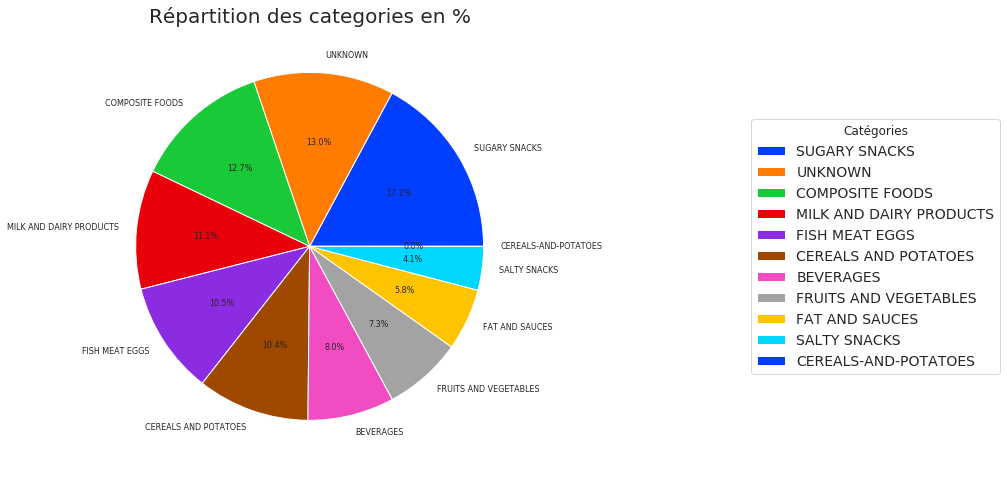

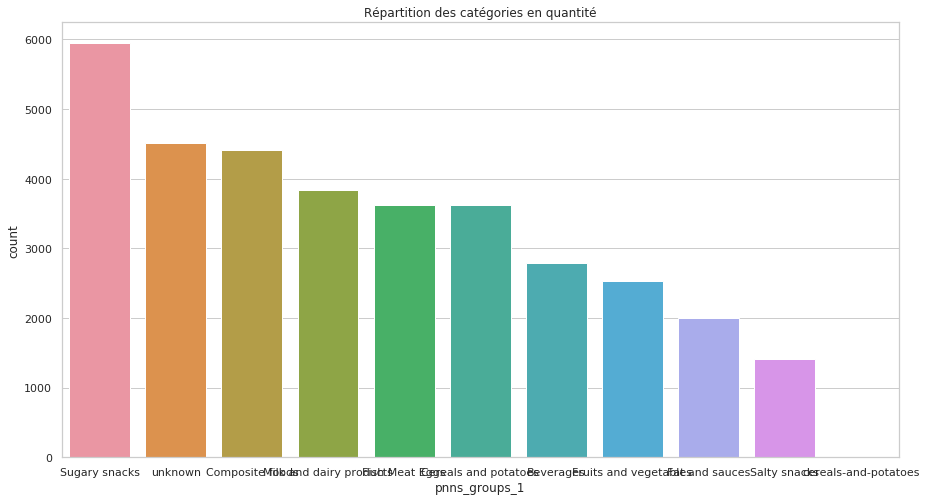

In [38]:
plt.figure(figsize=(8,8))
colors = sns.color_palette('bright')[0:10]
plt.title('Répartition des categories en %', size=20)
wedges, texts, autotexts = plt.pie(data_objet['pnns_groups_1'].value_counts().values, 
        labels = data_objet['pnns_groups_1'].value_counts().index.str.upper(),
       autopct='%1.1f%%', textprops={'fontsize': 8 } , colors = colors)


ax = plt.gca()

ax.legend(wedges, data_objet['pnns_groups_1'].value_counts().index.str.upper(),
          title="Catégories",
          loc="center left",
          fontsize=14,
          bbox_to_anchor=(1.5, 0, 0.5, 1))
#save_fig("repartition_categories_perc")

plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")
sns.countplot(x=data_objet["pnns_groups_1"], order=data_objet['pnns_groups_1'].value_counts().index)
plt.title('Répartition des catégories en quantité')
#save_fig("repartition_categories_count")
plt.show()

La représentation sous forme camembert des pourcentage de chaque categories me permet d'observer que :

La categorie  la plus representée dans notre variable :
- SUGARY SNACKS(collation sucrée)
- Composite foods(Aliments composés)

Les categories moyennement representées:
- Les categories Unknown(Inconnue),
- Beverages(Breuvages), 
- Milk and dairy products(Lait et produits laitiers), 
  
Les categories faiblement  representées:
- Fruits and vegetales(Fruits et légumes),
- Fish meat eggs(Oeufs de chair de poisson),
- cereals and potatoes(céréales et pommes de terre) et c...



In [39]:
data_objet.columns

Index(['pnns_groups_1', 'product_name', 'brands', 'countries_fr',
       'ingredients_text', 'nutrition_grade_fr', 'nutrition-grade-fr_1'],
      dtype='object')

In [40]:
catgoriel_columns = data_objet.nunique()[(data_objet.nunique() >1) & (data_objet.nunique() < 12)].keys().to_list()
catgoriel_columns

['pnns_groups_1', 'nutrition_grade_fr', 'nutrition-grade-fr_1']

In [41]:
#Crétation d'une fonction de construction de graphiques à barres et de maniére interactive
def bar_plot(a):
    data_objet[a].value_counts(normalize=True).plot(kind = 'bar')
    plt.ylabel('proportion')
    plt.title("Distribution de "+str(a))
    return plt.show() 

In [42]:
interact(bar_plot, a = catgoriel_columns)

interactive(children=(Dropdown(description='a', options=('pnns_groups_1', 'nutrition_grade_fr', 'nutrition-gra…

<function __main__.bar_plot(a)>

- On choisit les variables catégorielles dont le nbre de modalité est <= à5

- Nouus aller chercher par la suite si une de ces variables(facteurs) influent sur l'une des variables nutritionnelles (VD) [Corrélation entre variables catégorielles et variables nutritionnelles]

##### I-2 : Variables numériques : 
- 'saturated-fat_100g'
- 'energy_100g'
- 'fat_100g'
- 'carbohydrates_100g',
- 'sugars_100g'
- 'fiber_100g'
- 'proteins_100g'
- 'salt_100g',
- 'sodium_100g'
- 'nutrition-score-fr_100g'

I-2-a : Histogrammes

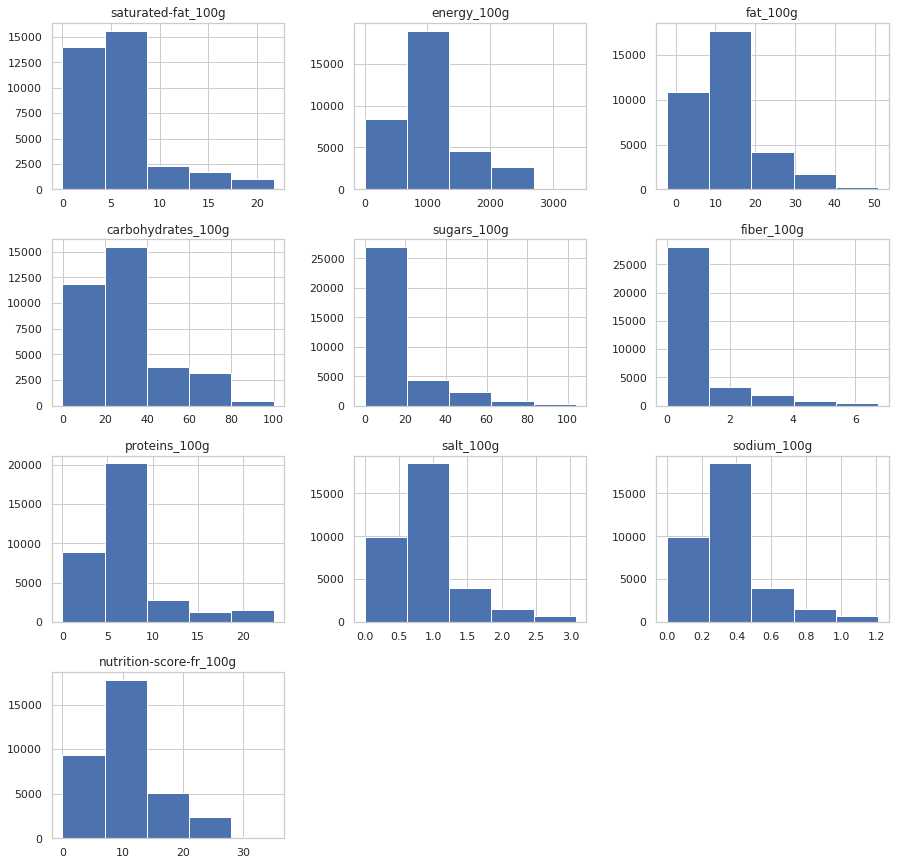

In [43]:
%matplotlib inline
#import matplotlib.pyplot as plt
data_float.hist(bins=5, figsize=(15,15))
#save_fig("attribute_histogram_plots")
plt.show()

- Mises à l'echelle des valeurs de nos variables à fin de pouvoir les comparer

In [44]:
# Centrage et Réduction
data_float_std_scale = preprocessing.StandardScaler().fit(data_float)
data_float_X_scaled = data_float_std_scale.transform(data_float)
#data_float_X_scaled

In [45]:
data_float_scaled = pd.DataFrame(data_float_X_scaled, columns=data_float.columns)

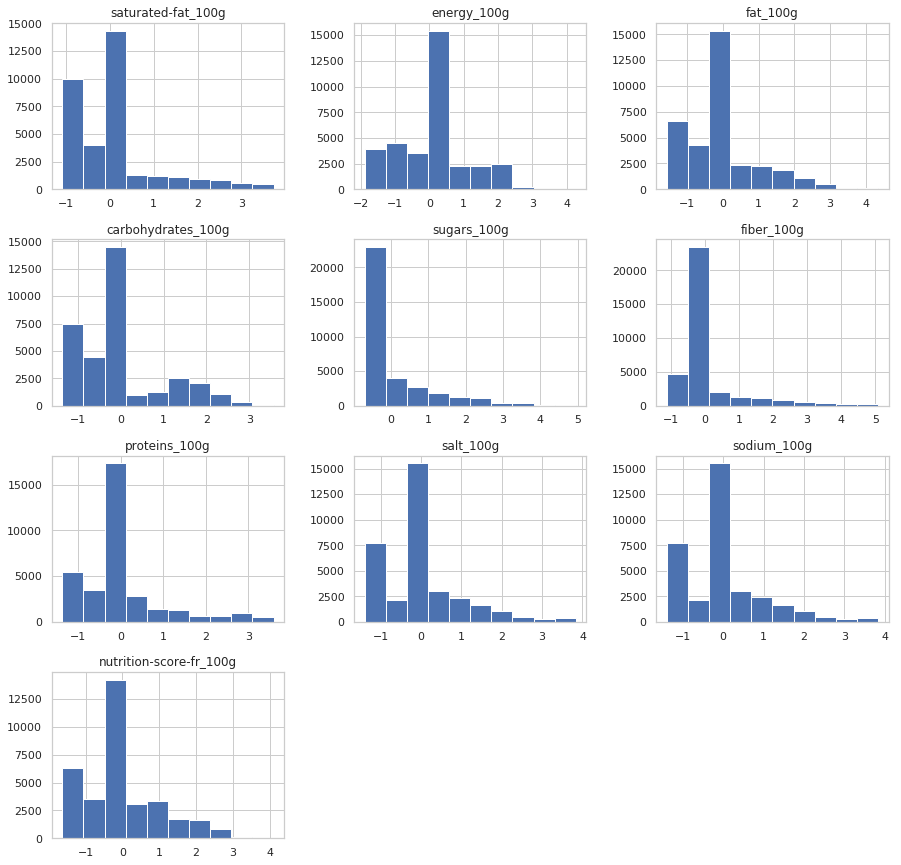

In [46]:
%matplotlib inline
#import matplotlib.pyplot as plt
data_float_scaled.hist(bins=10, figsize=(15,15))
#save_fig("attribute_histogram_plots")
plt.show()

- À part la variable 'enrgie_100g' qui pourrait suivre une loi narmale, les autres ne sont pas en forme de cloche
- Toutes les variables représentent une forte assymétrie à droite
- On peut déduire aussi qu'il y'a des valeures dominantes dans chaque variable

In [47]:
print(data_float.shape)

(34671, 10)


In [48]:
def dessinner_histogramme_boxplot(df, col, title):
    plt.figure(figsize=(50,10))
    df[col].hist(bins=10, figsize=(15,5))
    plt.title(title)
    plt.show()
    sns.color_palette()
    sns.boxplot(x=df[col])
    plt.title(title)
    plt.show()

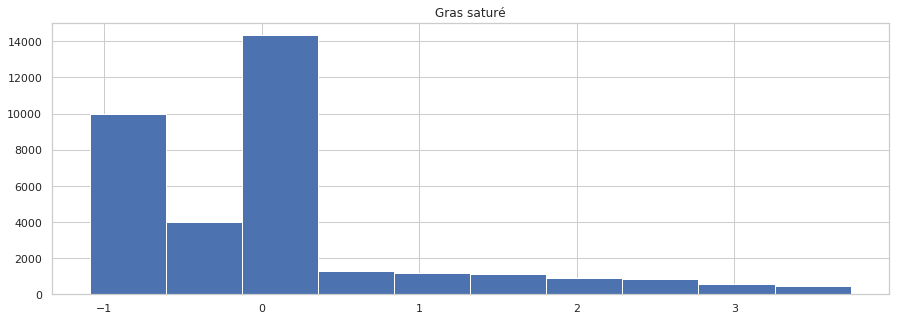

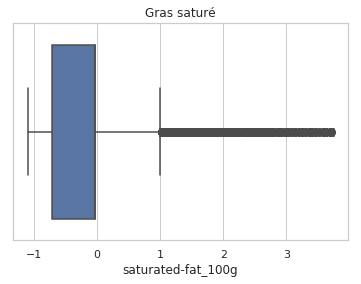

In [49]:
dessinner_histogramme_boxplot(data_float_scaled, 'saturated-fat_100g', 'Gras saturé')

- Assymétrie à droite, pas de normalité donc pas de test de studen
- la majeur partie des valeurs sont comprises entre ...

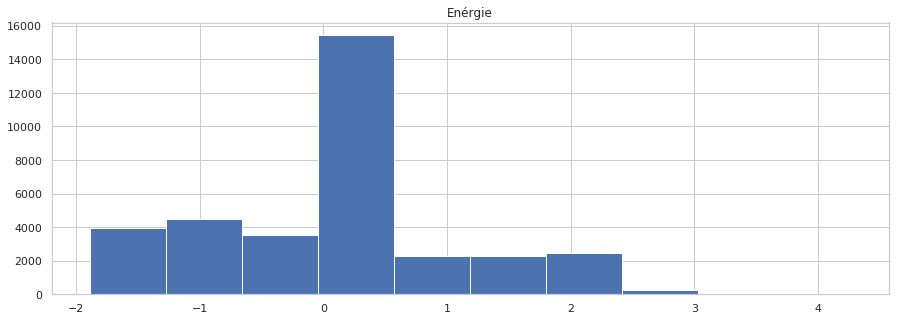

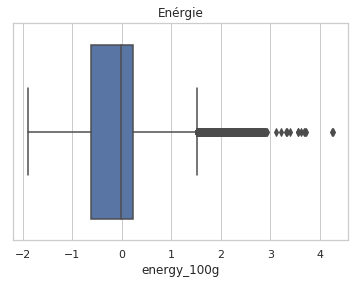

In [50]:
dessinner_histogramme_boxplot(data_float_scaled, 'energy_100g', 'Enérgie')

- Cette distibution a une forme en cloche, elle pourrait suivre une loi normale (centée autour de la mouenne et somme ecarts-type = 0)

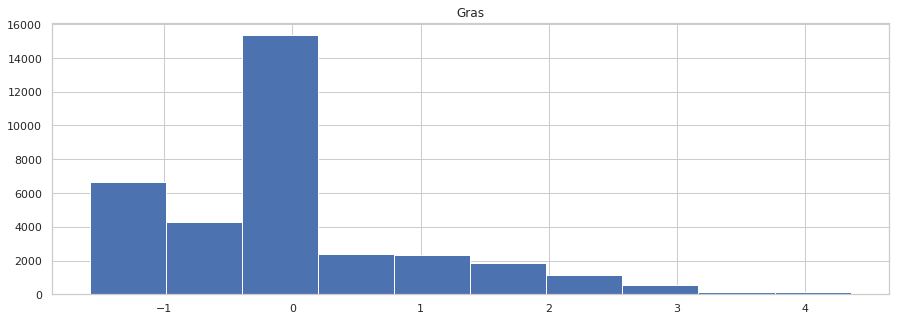

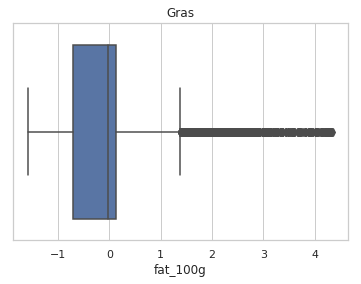

In [51]:
dessinner_histogramme_boxplot(data_float_scaled, 'fat_100g', 'Gras')

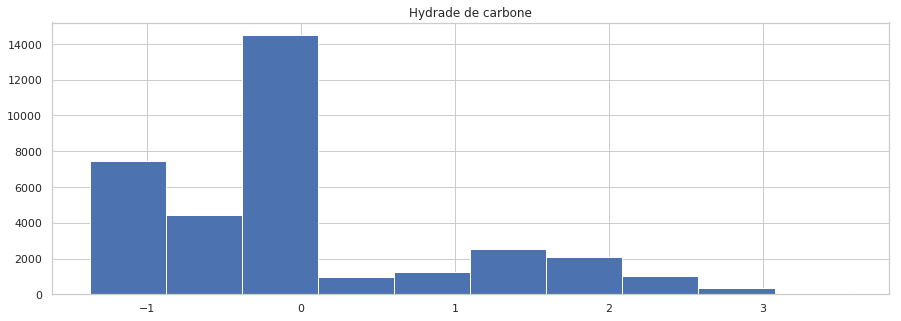

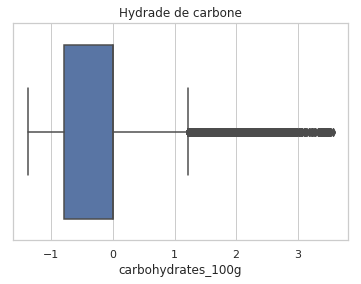

In [52]:
dessinner_histogramme_boxplot(data_float_scaled, 'carbohydrates_100g', 'Hydrade de carbone')

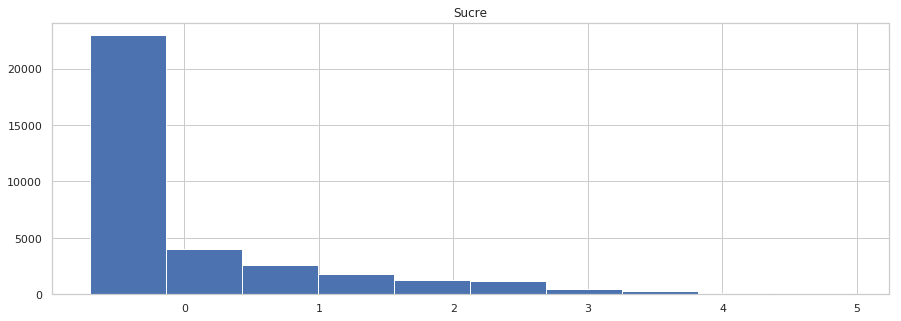

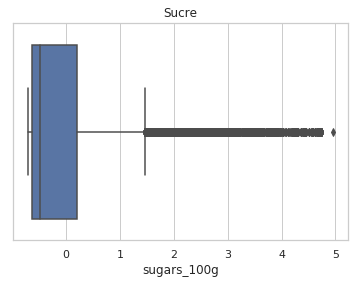

In [53]:
dessinner_histogramme_boxplot(data_float_scaled, 'sugars_100g', 'Sucre')

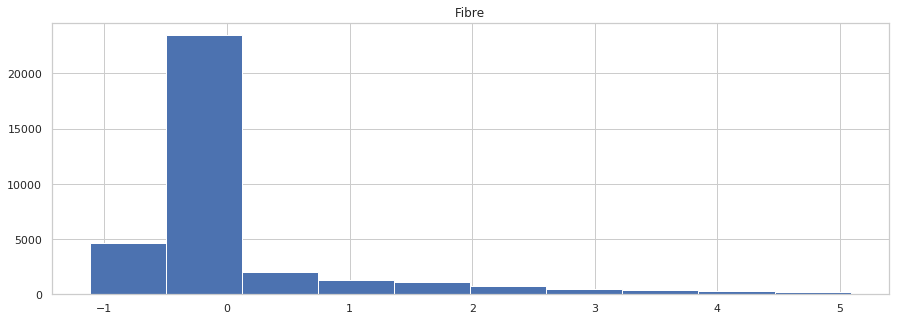

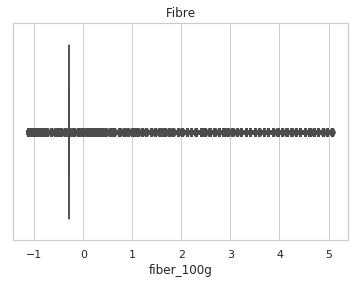

In [54]:
dessinner_histogramme_boxplot(data_float_scaled, 'fiber_100g', 'Fibre')

In [55]:
#data_float[data_float["fiber_100g"] >  6.5]

- Ces deux graphiques nous montre que la mojorité des valeurs sont égales à 1

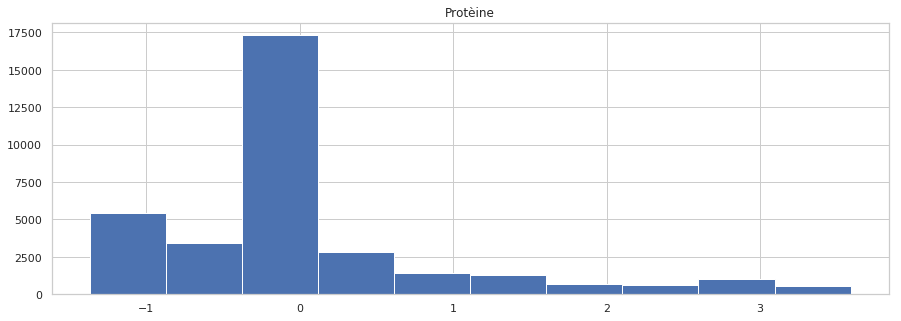

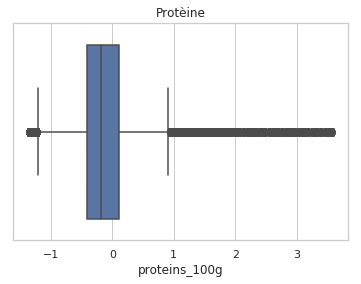

In [56]:
dessinner_histogramme_boxplot(data_float_scaled, 'proteins_100g', 'Protèine')

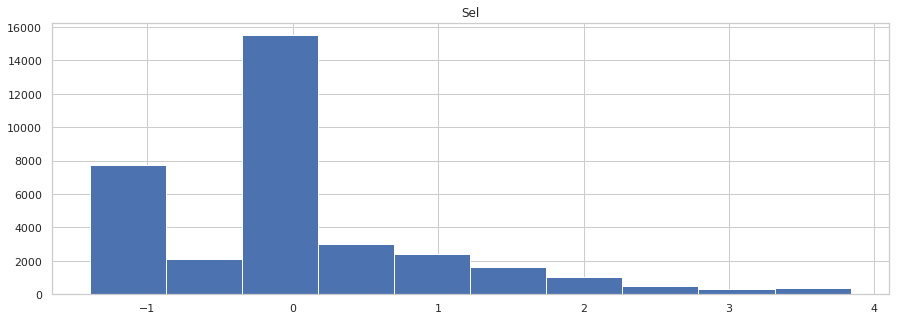

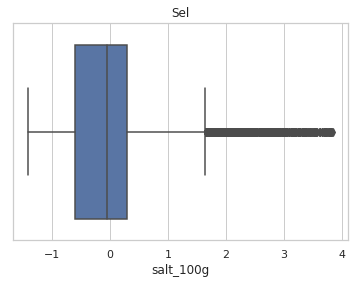

In [57]:
dessinner_histogramme_boxplot(data_float_scaled, 'salt_100g', 'Sel')

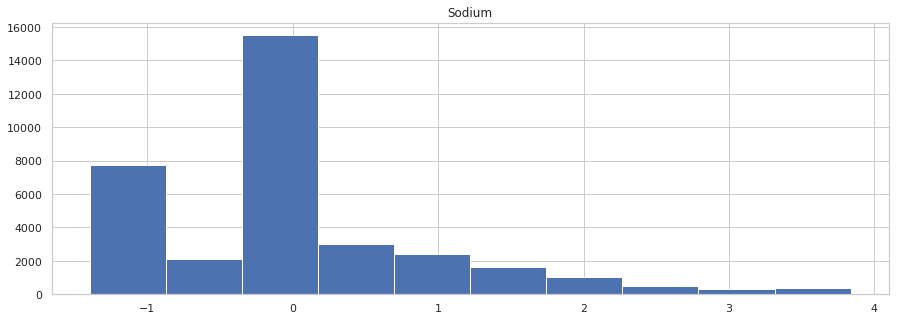

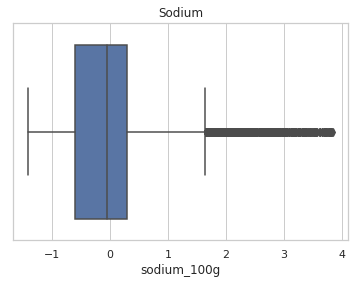

In [58]:
dessinner_histogramme_boxplot(data_float_scaled, 'sodium_100g', 'Sodium')

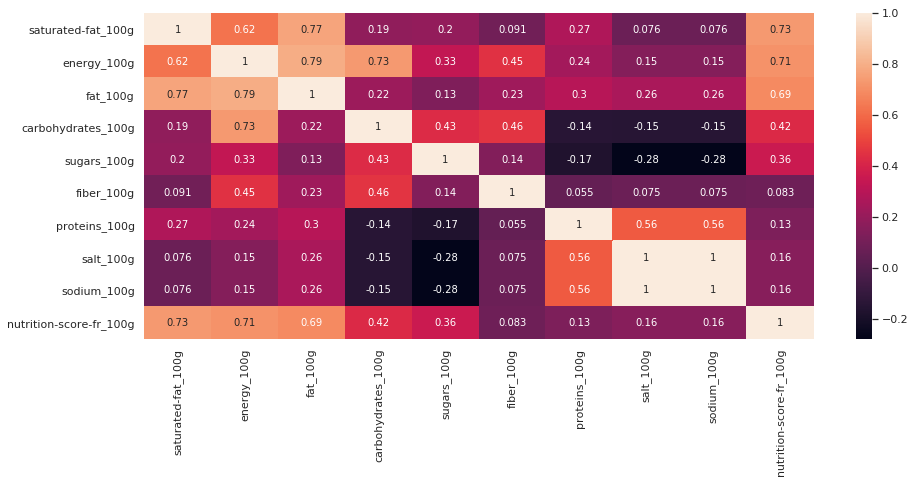

In [59]:
# Correlation entre les variables standardiées
plt.figure(figsize=(15, 6))
corr_data_float_scaled = data_float_scaled.corr()
sns.heatmap(corr_data_float_scaled, annot=True)
plt.show()


- La variable fat_100 est fortement correlée avec : saturated, energiy, et nutriscore

- La variable proteins est fortement correlée avec : soduim, salt

- La variables energy est fortement correlée avec : saturated, fat, carbonhydrate, sugars, nutriscore

Autre graphique illustrant les corrélations de nos variables

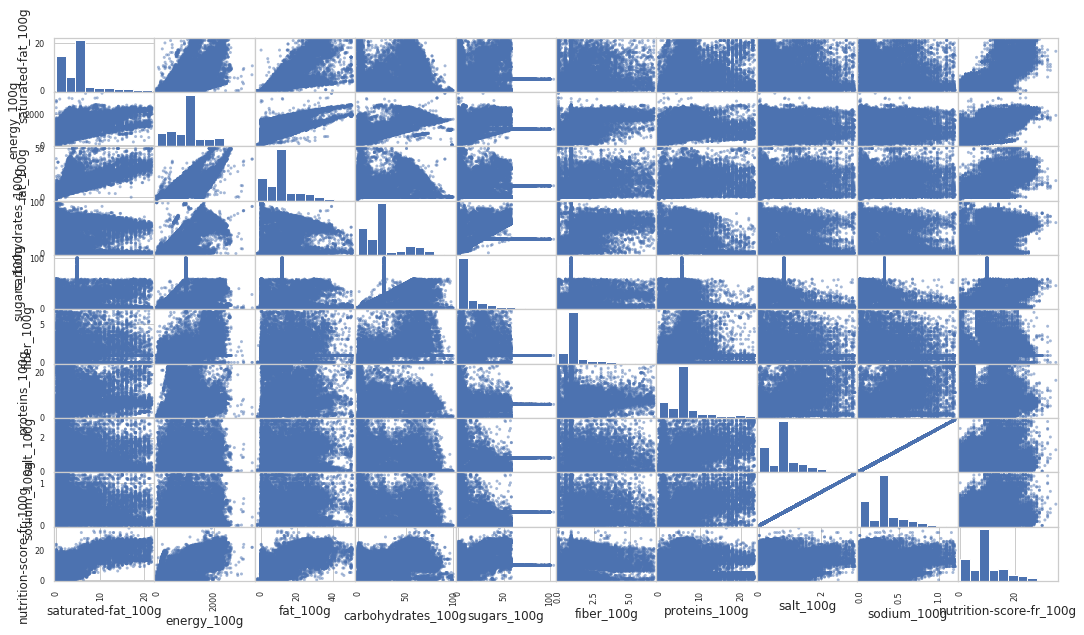

In [60]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_float, figsize=(18,10), diagonal='hist')
plt.show()

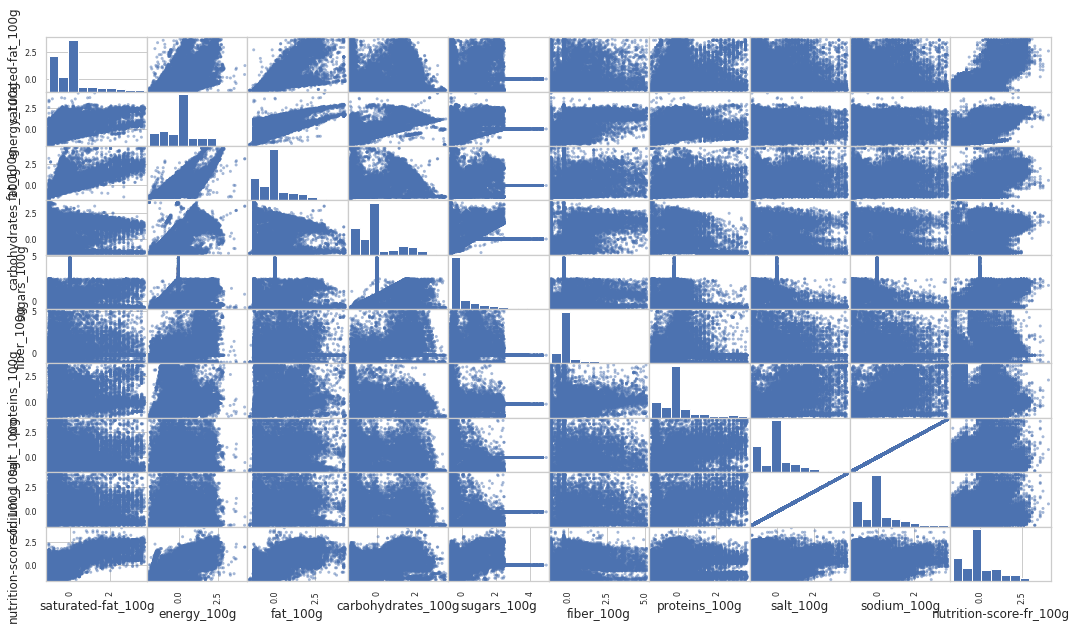

In [61]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_float_scaled, figsize=(18,10), diagonal='hist')
plt.show()

###### Testes de normalité : Verifions si nos variables suivent une loi normale [Jarque Bera et Shapiro-wilk]

In [62]:
numeric_columns = data_float_scaled.filter(regex='_100g').columns
numeric_columns

Index(['saturated-fat_100g', 'energy_100g', 'fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'nutrition-score-fr_100g'],
      dtype='object')

- Test de normalité avec Jarque Bera

In [63]:
#Test de normalité avec Jarque Bera 
# normality test : p>0.05 : la variable suit la loi normale

for column in numeric_columns:
    print('________\n{}'.format(column))
    stat, p = jarque_bera(data_float_scaled[column])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
    alpha = 0.05
    if p > alpha:
        print("H0 ne peut être rejetée :{}, on considère l'hypothèse de normalité, l'échantillon semble gaussien".format(column))
    else:
        print("H0 est rejetée : {} n'est pas une distribution normale, l'échantillon n'a pas l'air gaussien ".format(column))


________
saturated-fat_100g
Statistics=22919.031, p=0.000
H0 est rejetée : saturated-fat_100g n'est pas une distribution normale, l'échantillon n'a pas l'air gaussien 
________
energy_100g
Statistics=1469.384, p=0.000
H0 est rejetée : energy_100g n'est pas une distribution normale, l'échantillon n'a pas l'air gaussien 
________
fat_100g
Statistics=10050.012, p=0.000
H0 est rejetée : fat_100g n'est pas une distribution normale, l'échantillon n'a pas l'air gaussien 
________
carbohydrates_100g
Statistics=3896.679, p=0.000
H0 est rejetée : carbohydrates_100g n'est pas une distribution normale, l'échantillon n'a pas l'air gaussien 
________
sugars_100g
Statistics=39162.346, p=0.000
H0 est rejetée : sugars_100g n'est pas une distribution normale, l'échantillon n'a pas l'air gaussien 
________
fiber_100g
Statistics=104811.698, p=0.000
H0 est rejetée : fiber_100g n'est pas une distribution normale, l'échantillon n'a pas l'air gaussien 
________
proteins_100g
Statistics=22465.066, p=0.000
H0 e

La p_value = 0 < 0.05, H0 rejetée : aucune variable ne suit la loi normal

- Test de normalité avec shapiro

In [64]:
#Test de normalité avec shapiro
# normality test : p>0.05 : la variable suit la loi normale

for column in numeric_columns:
    print('________\n{}'.format(column))
    stat, p = shapiro(data_float_scaled[column])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
    alpha = 0.05
    if p > alpha:
        print("H0 ne peut être rejetée :{}, on considère l'hypothèse de normalité, l'échantillon semble gaussien".format(column))
    else:
        print("H0 est rejetée : {} n'est pas une distribution normale, l'échantillon n'a pas l'air gaussien ".format(column))

________
saturated-fat_100g
Statistics=0.811, p=0.000
H0 est rejetée : saturated-fat_100g n'est pas une distribution normale, l'échantillon n'a pas l'air gaussien 
________
energy_100g
Statistics=0.926, p=0.000
H0 est rejetée : energy_100g n'est pas une distribution normale, l'échantillon n'a pas l'air gaussien 
________
fat_100g
Statistics=0.889, p=0.000
H0 est rejetée : fat_100g n'est pas une distribution normale, l'échantillon n'a pas l'air gaussien 
________
carbohydrates_100g
Statistics=0.901, p=0.000
H0 est rejetée : carbohydrates_100g n'est pas une distribution normale, l'échantillon n'a pas l'air gaussien 
________
sugars_100g
Statistics=0.712, p=0.000
H0 est rejetée : sugars_100g n'est pas une distribution normale, l'échantillon n'a pas l'air gaussien 
________
fiber_100g
Statistics=0.639, p=0.000
H0 est rejetée : fiber_100g n'est pas une distribution normale, l'échantillon n'a pas l'air gaussien 
________
proteins_100g
Statistics=0.823, p=0.000
H0 est rejetée : proteins_100g 

/home/mel/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1653: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/home/mel/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1653: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/home/mel/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1653: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/home/mel/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1653: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/home/mel/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1653: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/home/mel/anaconda3/lib/p

Suite au test de normalité avec shapiro qui montre que toute mes nutritions ont une distribution anormale , de ce fait je ne pourrai pas faire l'ANOVA mais j'appliquerai le test de Kruskal Wallis ( qui n'est pas liée à la normalité d'un échantillon)

- Test Kruskal Wallis

In [65]:
data_a = openfoodfacts_cleaned[openfoodfacts_cleaned['nutrition_grade_fr'] == 'a'].select_dtypes(['float64'])
data_b = openfoodfacts_cleaned[openfoodfacts_cleaned['nutrition_grade_fr'] == 'b'].select_dtypes(['float64'])
data_c = openfoodfacts_cleaned[openfoodfacts_cleaned['nutrition_grade_fr'] == 'c'].select_dtypes(['float64'])
data_d = openfoodfacts_cleaned[openfoodfacts_cleaned['nutrition_grade_fr'] == 'd'].select_dtypes(['float64'])
data_e = openfoodfacts_cleaned[openfoodfacts_cleaned['nutrition_grade_fr'] == 'e'].select_dtypes(['float64'])

In [66]:
data_a.shape[0], data_b.shape[0], data_c.shape[0], data_d.shape[0], data_e.shape[0]

(6102, 4930, 7586, 9605, 6448)

In [67]:
levene(data_a['energy_100g'], data_b['energy_100g'], data_c['energy_100g'], data_d['energy_100g'], data_e['energy_100g'], center='mean')

LeveneResult(statistic=3724.1737732401093, pvalue=0.0)

In [68]:
#Test de kurskal (variable qualitative : X = "nutrition_grade_fr" )
def kurskal_most_col(data):

    Y = data.filter(regex='_100g').columns# quantitative
    p = []
    feature = []
    for col in Y:     
        p.append(kruskal(data_a[col], data_b[col], data_c[col], data_d[col], data_e[col]))
        feature.append(col)
        df = pd.DataFrame (np.column_stack([feature, p]), columns = ['feature', 'statistic', 'p_value'])
    return df

In [69]:
# Interprétation : p <0.05 : on dit que les deux variables sont significativement différentes
kurskal_most_col(data_float_scaled)

feature           statistic                  p_value
0       saturated-fat_100g  12003.793846944964                      0.0
1              energy_100g   9475.304248234195                      0.0
2                 fat_100g  10008.310846495799                      0.0
3       carbohydrates_100g  3951.0263754392117                      0.0
4              sugars_100g   4336.287256400327                      0.0
5               fiber_100g   255.9353713108464   3.4262666920688977e-54
6            proteins_100g   806.4863538277742  3.0224289433965395e-173
7                salt_100g   1394.428090819568  1.1162872234159224e-300
8              sodium_100g  1394.6164204115387   1.016106594649305e-300
9  nutrition-score-fr_100g  24912.759438738376                      0.0


Valeur de p ≤ 0.05 : les différences entre certaines médianes sont statistiquement significatives.

Dans mon cas tout les valeurs de P sont inferieur à 0.05 du coup je rejete l'hypothèse nulle et je conclu que toutes les medianes de mes nutritions sont differents. Au moins une médiane est différente.


In [70]:
#outliers_intq = detect_outliers_interq(data_float, data_float.columns)
#outliers_metier = detect_outliers(data_float, data_float.columns)
#outliers_intq
#outliers_metier
#openfoodfacts_cleaned[openfoodfacts_cleaned['nutrition_grade_fr'] == openfoodfacts_cleaned['nutrition-grade-fr_1']]

### II: Analyse bivariée de nos variables

- Comportement de quelques variables catégorielles par rapport aux variables nutritionnelles

In [71]:
#Selection des variables concernées
Nutritive_col= data_float.columns

In [72]:
#Selection des variables concernées
Nutritive_col= data_float.columns

- Illustration de la répartition de chaque modalité de la variable 'pnns_groups_1' en fontion des nutritions

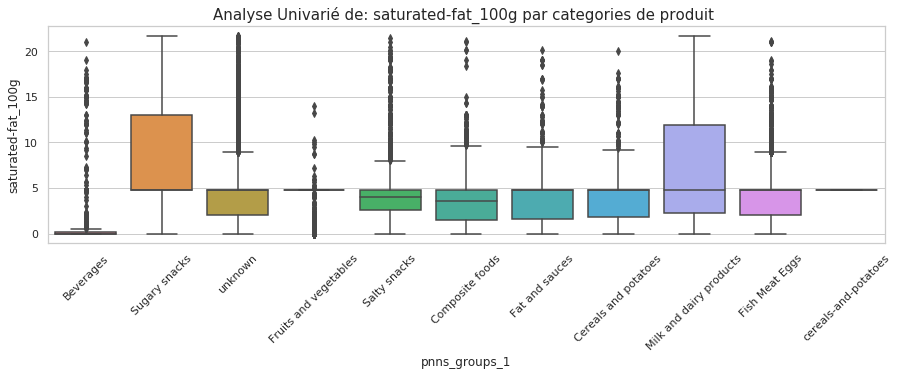

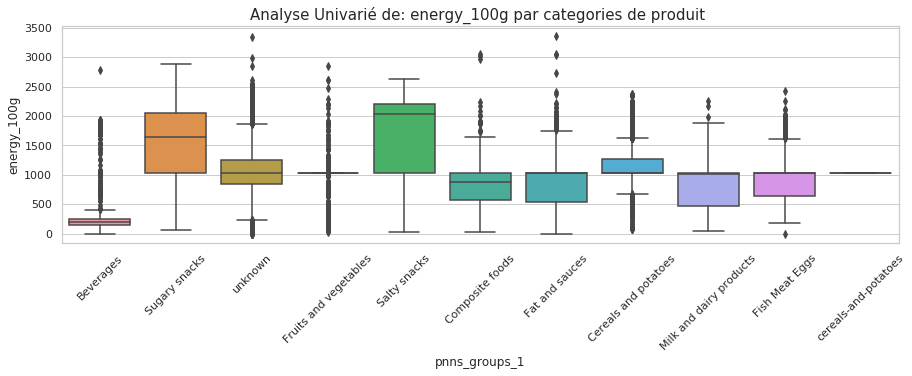

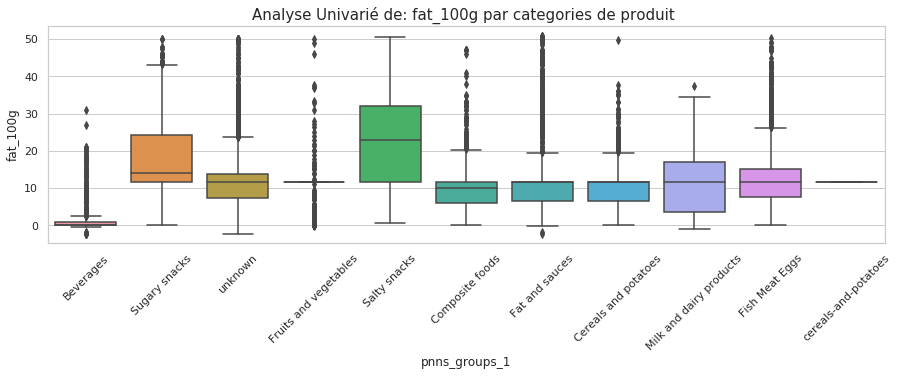

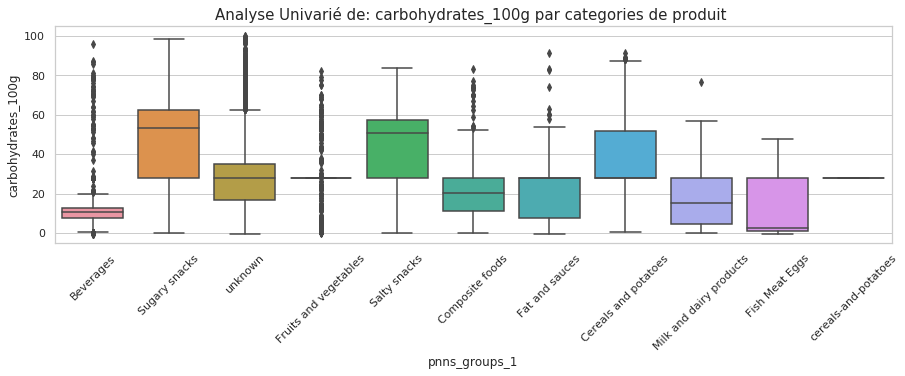

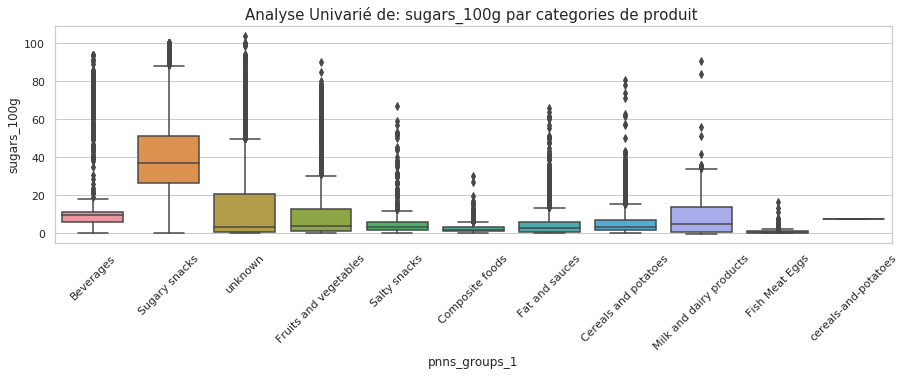

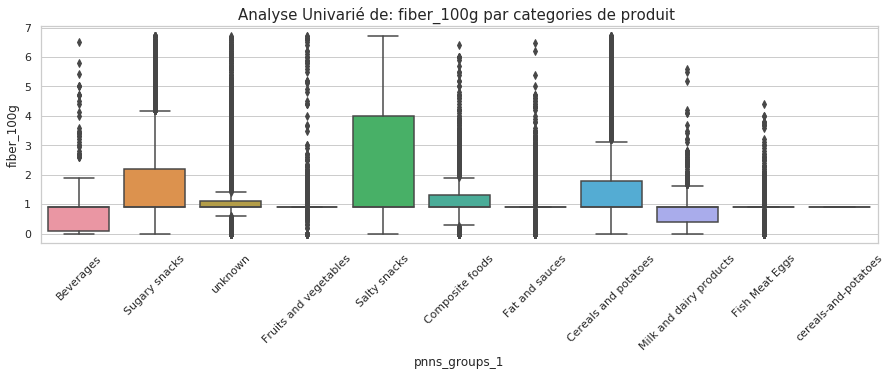

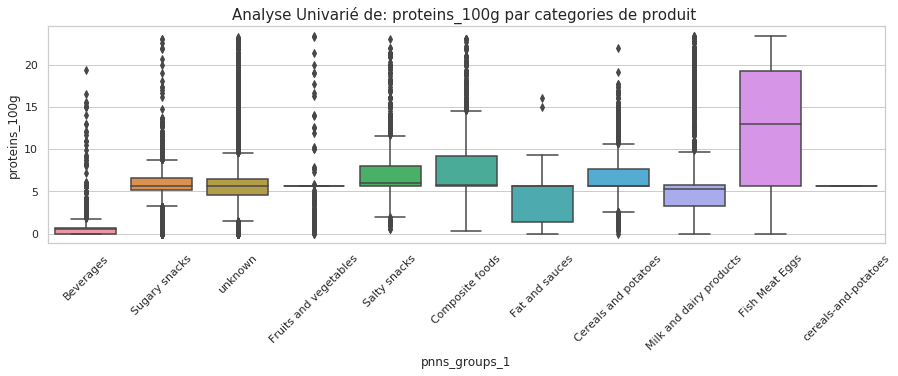

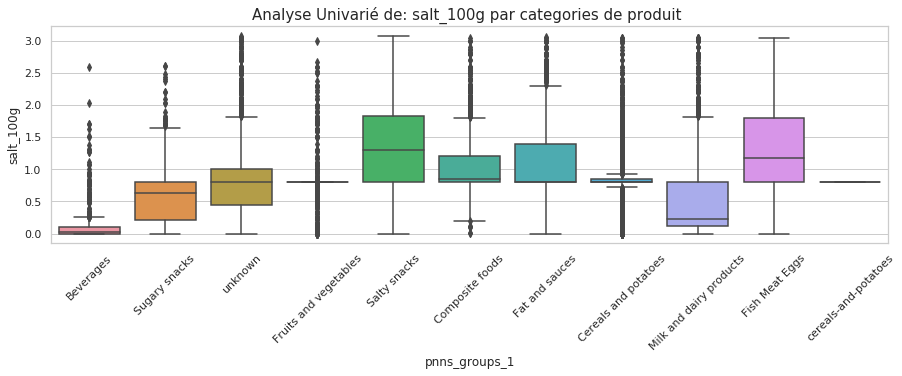

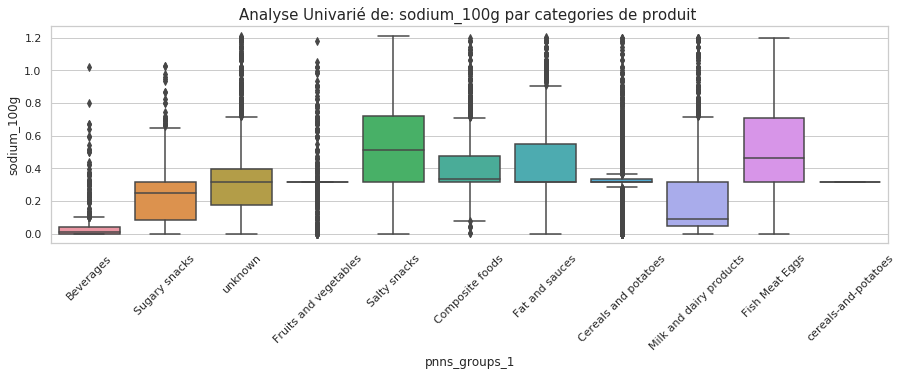

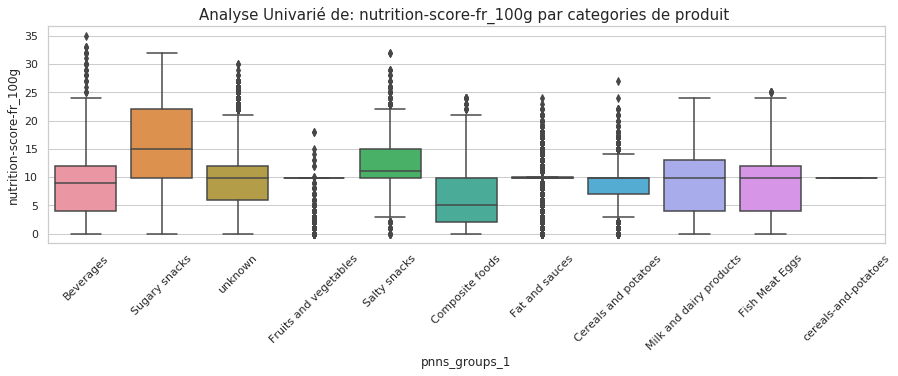

In [73]:
#Boxplots des nutritions en fonction des modalités de 'pnns_groups_1'
for column in Nutritive_col:
   
    sns.set(style="whitegrid")
    plt.figure(figsize=(15, 4))
    plt.xticks(rotation=45)
    plt.title('Analyse Univarié de: ' + column + ' par categories de produit ', size=15)
    sns.boxplot(x ='pnns_groups_1' , y = column, data = openfoodfacts_cleaned)
    #chaine = 'Analyse Univarié de: ' + column + ' par categories de produit '
    plt.show()
sns.set(font_scale=1)

 ### Energy
 Les categories colation salée et collation sucrée sont plus présents dans les les aliments dont le nutriment energie_100g est entre 1000 et 2000
 
 ### Les gras:
 Plus un produit est de categorie gras et sauce, Fish meat eggs(Oeufs de chair de poisson) plus il y'a du gras

### Les sucres:
 Les cereales sont les plus sucré par rapport aux autres et les categories aliments composés sont des produits qui n'ont presque pas de sucre

- Illustration de la répartition de chaque modalité de la variable 'nutrition_grade_fr' en fontion des nutritions

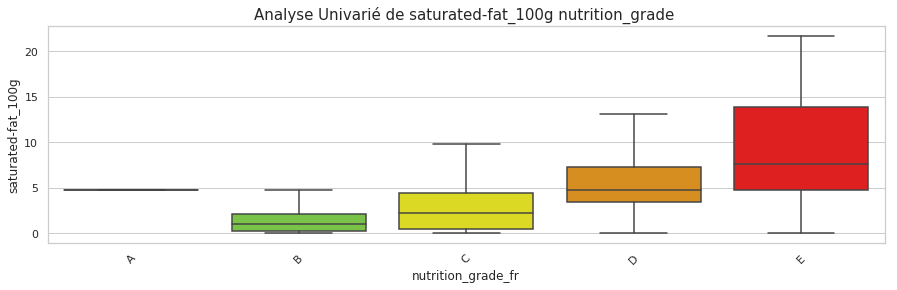

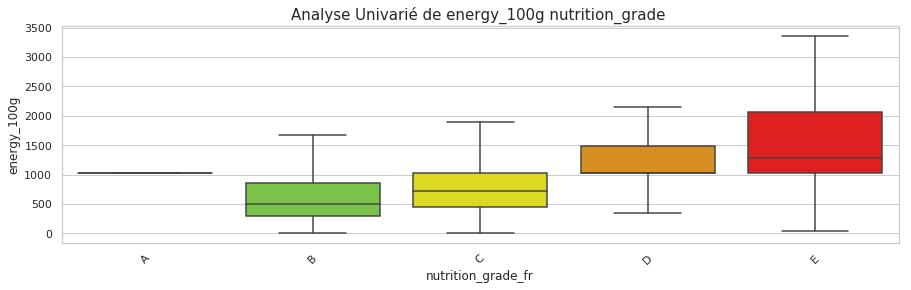

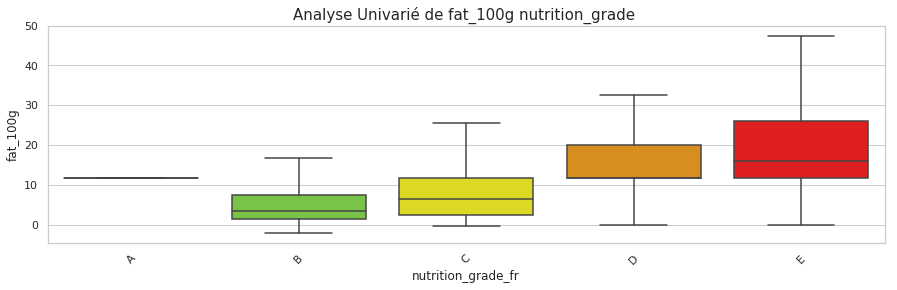

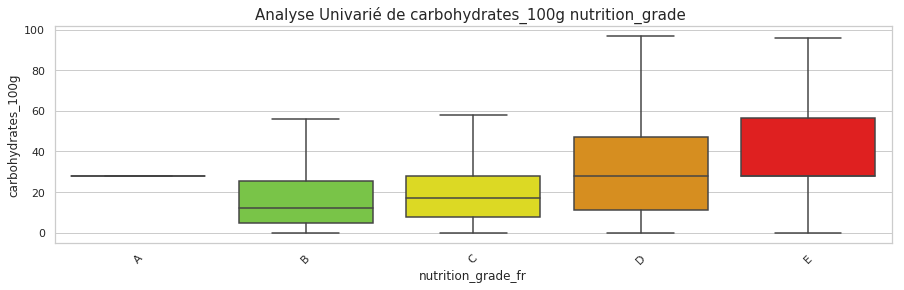

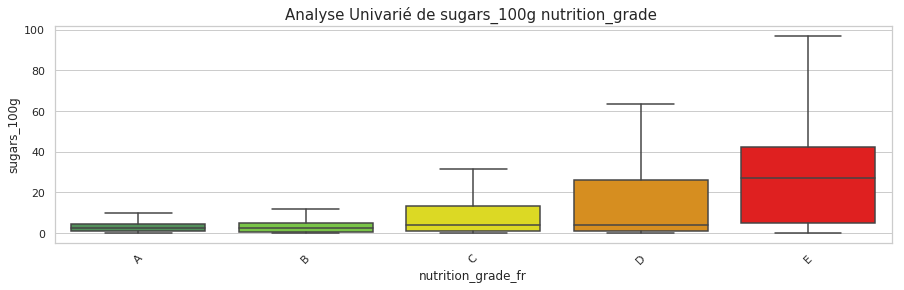

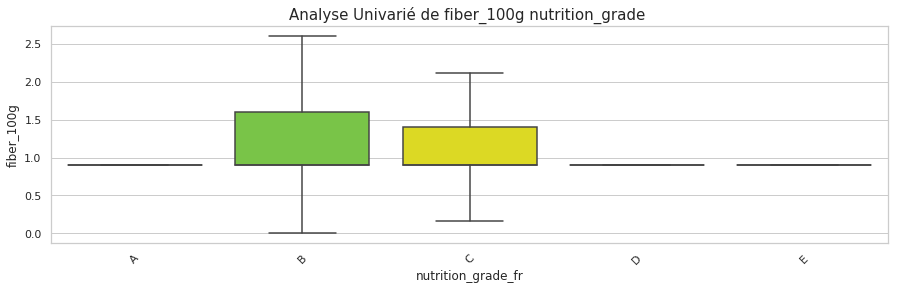

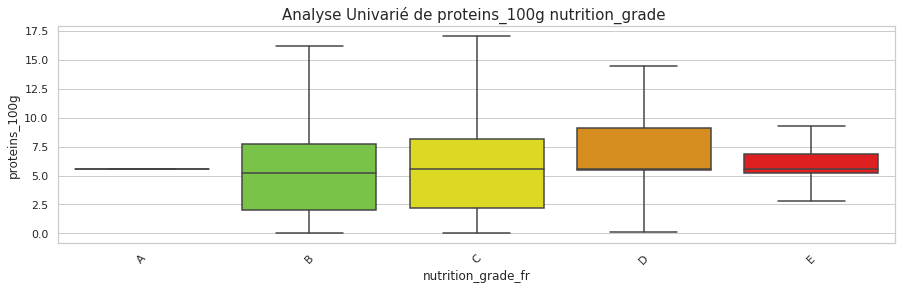

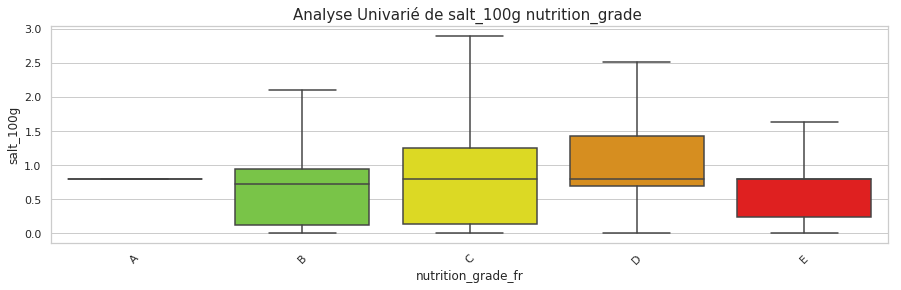

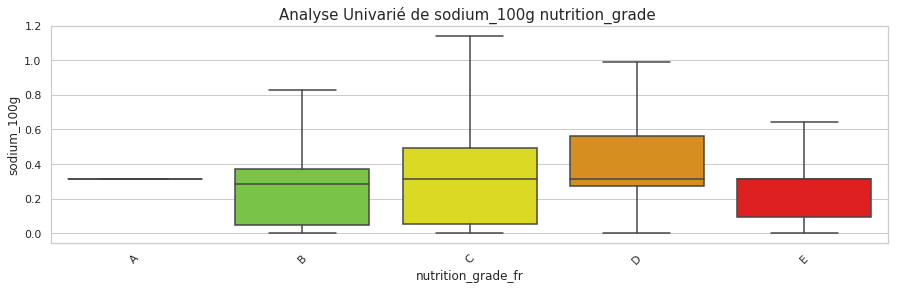

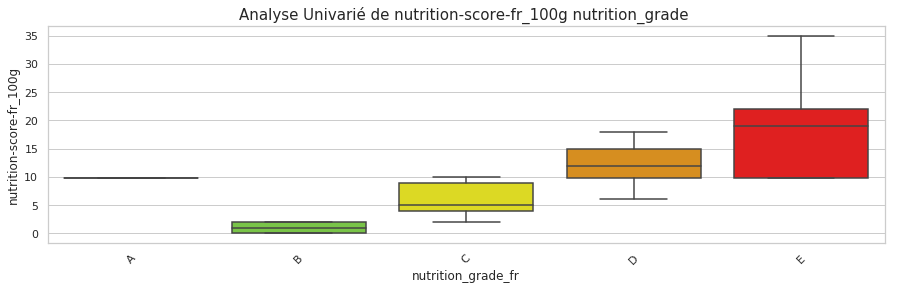

In [74]:
#Boxplots des nutritions en fonction des modalités de 'pnns_groups_1'
order = sorted(openfoodfacts_cleaned["nutrition_grade_fr"].dropna().unique())
labels = ['A', 'B', 'C', 'D', 'E']
y_pos = np.arange(len(labels))

for column in Nutritive_col:
   
    sns.set(style="whitegrid")
    plt.figure(figsize=(15, 4))
    plt.xticks(rotation=45)
    plt.title('Analyse Univarié de ' + column + ' nutrition_grade ', size=15)
    sns.boxplot(x ='nutrition_grade_fr' , y = column, data = openfoodfacts_cleaned, order=order, showfliers=False, palette={'a':"#499A53", 'b':"#74D834", 'c':"#FBF605", 'd':"#F49402", 'e':"#FF0000"})

    plt.xticks(y_pos, labels)
    plt.show()
sns.set(font_scale=1)

##### A la fin de cette étude , on remarque qu'il y a une différence entre les nutri-grade : a,b,c ,d,e et cette  différente pour toutes les variables.
pour voir si cette différence est statis significative, on va utiliser des tests statistique.
Tout d'abord on teste les normalités des variables. Si la normalité est ok, on utilise ANOVA, sinon on utilise le test : Kruskal Wallis

Les boxplots des nutritions nous permets de conclure:
Les gras saturés (Saturated-fat):
- Plus il y a du gras ,du sucre, dU sel, energy, carbohydrate(glucides) dans un produit et plus son Nutri-Score est mauvais
- plus il ya le calcuim et le soduim plus le produit est de bonne qualité



- Illustration de la répartition de chaque modalité de la variable 'nutrition-grade-fr_100g' en fontion des nutritions

In [75]:
data_objet.columns

Index(['pnns_groups_1', 'product_name', 'brands', 'countries_fr',
       'ingredients_text', 'nutrition_grade_fr', 'nutrition-grade-fr_1'],
      dtype='object')

In [ ]:
for column in Nutritive_col:
   
    sns.set(style="whitegrid")
    plt.figure(figsize=(15, 4))
    plt.xticks(rotation=45)
    plt.title('Analyse Univarié de: ' + column + ' par categories de produit ', size=15)
    sns.boxplot(x ='brands' , y = column, data = openfoodfacts_cleaned)
    #chaine = 'Analyse Univarié de: ' + column + ' par categories de produit '
    plt.show()
sns.set(font_scale=1)

### Hypothèses: 

- Différence entre les groupes de grade de nutrition pour les différents features. 

- Pour investiguer si différence entre les groupes sont statistiquement significatif => ( shapiro: tester la normalité , et ANOVA / Kruskal wallis )


In [ ]:
### Hypothéses sur l'inflence ou pas des facteurs 'nutrition_grade_fr' et ''pnns_groups_1' sur une ou plusieurs variables nutritionnelles

######  Facteur :  'pnns_groups_1'
- H0 : La variable 'pnns_groups_1' effecte-t-elle l'une des variables nutritionnelles [VD]
- Ha : Les deux variables sont indépendantes

######  Facteur :  'nutrition_grade_fr'
- H0 : La variable 'nutrition_grade_fr' effecte-t-elle l'une des variables nutritionnelles [VD]
- Ha : Les deux variables sont indépendantes

In [107]:
pd.crosstab(openfoodfacts_cleaned.nutrition_grade_fr, openfoodfacts_cleaned.pnns_groups_1)

pnns_groups_1       Beverages  Cereals and potatoes  Composite foods  \
nutrition_grade_fr                                                     
a                          97                  1709             1023   
b                         337                   588             1399   
c                         730                   806             1215   
d                         441                   465              711   
e                        1183                    48               58   

pnns_groups_1       Fat and sauces  Fish Meat Eggs  Fruits and vegetables  \
nutrition_grade_fr                                                          
a                               64             328                   1818   
b                              142             464                    425   
c                              538             958                    261   
d                              873            1118                     28   
e                              377             757                      0   

pnns_groups_1       Milk and dairy products  Salty snacks  Sugary snacks  \
nutrition_grade_fr                                                         
a                                       285            36             43   
b                                       610            41            214   
c                                      1078           370            555   
d                                      1702           706           2275   
e                                       162           253           2860   

pnns_groups_1       cereals-and-potatoes  unknown  
nutrition_grade_fr                                 
a                                      1      698  
b                                      0      710  
c                                      0     1075  
d                                      0     1286  
e                                      0      750

In [84]:
#openfoodfacts_cleaned['nutrition-score-fr_100g']

### Analyse multivariée

### ACP

In [ ]:
df_acp.shape

In [40]:
df_acp = openfoodfacts_cleaned.copy()
df_acp_mediane = openfoodfacts_cleaned.copy() #remplace les outliers par la médiane
df_acp_moyenne = openfoodfacts_cleaned.copy() #remplace les outliers par la moyenne
df_acp_zero = openfoodfacts_cleaned.copy() #remplace les outliers par zero
df_acp_limites = openfoodfacts_cleaned.copy() #remplace les outliers par les limites inf et supp
df_cleaned = openfoodfacts_cleaned.copy() #supprime les outliers

### Déb : Suppréssion des outliers tout simplement

In [41]:
#Calculer les limites supérieurs et inférieurs pour chaque variable
Limite_inf_saturated_fat, Limite_sup_saturated_fat = limites_inf_sup(df_cleaned, 'saturated-fat_100g')
Limite_inf_fat, Limite_sup_fat = limites_inf_sup(df_cleaned, 'fat_100g')
Limite_inf_energy, Limite_sup_energy = limites_inf_sup(df_cleaned, 'energy_100g')
Limite_inf_carbohydrates, Limite_sup_carbohydrates = limites_inf_sup(df_cleaned, 'carbohydrates_100g')
Limite_inf_sugars, Limite_sup_sugars = limites_inf_sup(df_cleaned, 'sugars_100g')
Limite_inf_fiber, Limite_sup_fiber = limites_inf_sup(df_cleaned, 'fiber_100g')
Limite_inf_proteins, Limite_sup_proteins = limites_inf_sup(df_cleaned, 'proteins_100g')
Limite_inf_salt, Limite_sup_salt = limites_inf_sup(df_cleaned, 'salt_100g')
Limite_inf_sodium, Limite_sup_sodium = limites_inf_sup(df_cleaned, 'sodium_100g')
#Limite_inf_nutrition-score-fr, Limite_sup_nutrition-score-fr = limites_inf_sup(df_cleaned, 'nutrition-score-fr_100g')

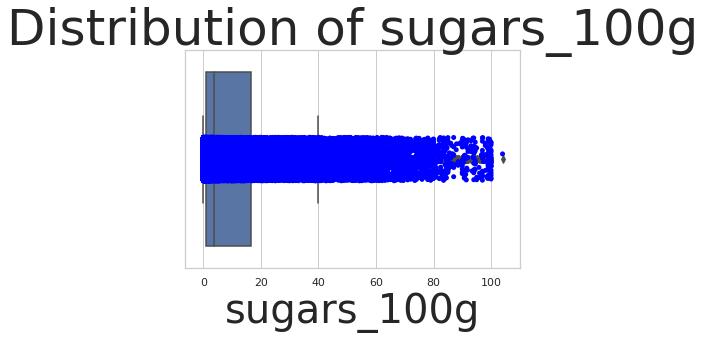

In [42]:
# Visualisation de la dispérsion avant
visualiser_distributions(df_cleaned, ['sugars_100g'])

In [43]:
# Supprime les outliers
df_cleaned.drop(df_cleaned.loc[df_cleaned['saturated-fat_100g'] > Limite_sup_saturated_fat, 'saturated-fat_100g'].index, inplace=True)
df_cleaned.drop(df_cleaned.loc[df_cleaned['fat_100g'] > Limite_sup_fat, 'fat_100g'].index, inplace=True)
df_cleaned.drop(df_cleaned.loc[df_cleaned['energy_100g'] > Limite_sup_energy, 'energy_100g'].index, inplace=True)
df_cleaned.drop(df_cleaned.loc[df_cleaned['carbohydrates_100g'] > Limite_sup_carbohydrates, 'carbohydrates_100g'].index, inplace=True)
df_cleaned.drop(df_cleaned.loc[df_cleaned['sugars_100g'] > Limite_sup_sugars, 'sugars_100g'].index, inplace=True)
df_cleaned.drop(df_cleaned.loc[df_cleaned['fiber_100g'] > Limite_sup_fiber, 'fiber_100g'].index, inplace=True)
df_cleaned.drop(df_cleaned.loc[df_cleaned['proteins_100g'] > Limite_sup_proteins, 'proteins_100g'].index, inplace=True)
df_cleaned.drop(df_cleaned.loc[df_cleaned['salt_100g'] > Limite_sup_salt, 'salt_100g'].index, inplace=True)
df_cleaned.drop(df_cleaned.loc[df_cleaned['sodium_100g'] > Limite_sup_sodium, 'sodium_100g'].index, inplace=True)
#df_cleaned.drop(df_cleaned.loc[df_cleaned['nutrition-score-fr_100g'] > Limite_sup, 'nutrition-score-fr_100g'].index, inplace=True)

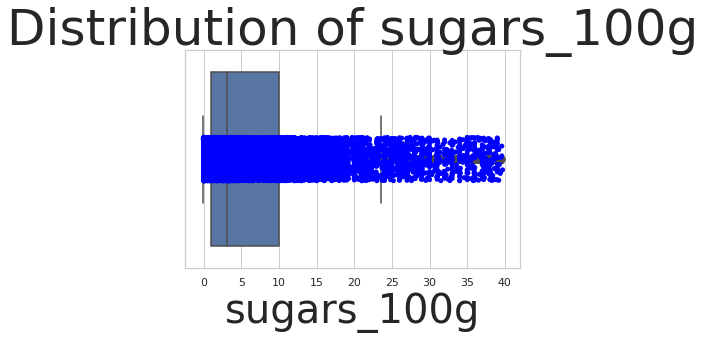

In [44]:
# Visualisation de la dispérsion aprés nettoyage des outliers
visualiser_distributions(df_cleaned, ['sugars_100g'])

In [45]:
# Remplace les outliers par les limites inf et supp
df_acp_limites.loc[df_acp_limites['saturated-fat_100g'] > Limite_sup_saturated_fat, 'saturated-fat_100g'] = Limite_sup_saturated_fat
df_acp_limites.loc[df_acp_limites['saturated-fat_100g'] < Limite_inf_saturated_fat, 'saturated-fat_100g'] = Limite_inf_saturated_fat

df_acp_limites.loc[df_acp_limites['fat_100g'] > Limite_sup_fat, 'fat_100g'] = Limite_sup_fat
df_acp_limites.loc[df_acp_limites['fat_100g'] < Limite_inf_fat, 'fat_100g'] = Limite_inf_fat

df_acp_limites.loc[df_acp_limites['energy_100g'] > Limite_sup_energy, 'energy_100g'] = Limite_sup_energy
df_acp_limites.loc[df_acp_limites['energy_100g'] < Limite_inf_energy, 'energy_100g'] = Limite_inf_energy

df_acp_limites.loc[df_acp_limites['carbohydrates_100g'] > Limite_sup_carbohydrates, 'carbohydrates_100g'] = Limite_sup_carbohydrates
df_acp_limites.loc[df_acp_limites['carbohydrates_100g'] < Limite_inf_carbohydrates, 'carbohydrates_100g'] = Limite_inf_carbohydrates

df_acp_limites.loc[df_acp_limites['sugars_100g'] > Limite_sup_sugars, 'sugars_100g'] = Limite_sup_sugars
df_acp_limites.loc[df_acp_limites['sugars_100g'] < Limite_inf_sugars, 'sugars_100g'] = Limite_inf_sugars

df_acp_limites.loc[df_acp_limites['fiber_100g'] > Limite_sup_fiber, 'fiber_100g'] = Limite_sup_fiber
df_acp_limites.loc[df_acp_limites['fiber_100g'] < Limite_inf_fiber, 'fiber_100g'] = Limite_inf_fiber

df_acp_limites.loc[df_acp_limites['proteins_100g'] > Limite_sup_proteins, 'proteins_100g'] = Limite_sup_proteins
df_acp_limites.loc[df_acp_limites['proteins_100g'] < Limite_inf_proteins, 'proteins_100g'] = Limite_inf_proteins

df_acp_limites.loc[df_acp_limites['salt_100g'] > Limite_sup_salt, 'salt_100g'] = Limite_sup_salt
df_acp_limites.loc[df_acp_limites['salt_100g'] < Limite_inf_salt, 'salt_100g'] = Limite_inf_salt

df_acp_limites.loc[df_acp_limites['sodium_100g'] > Limite_sup_sodium, 'sodium_100g'] = Limite_sup_sodium
df_acp_limites.loc[df_acp_limites['sodium_100g'] < Limite_inf_sodium, 'sodium_100g'] = Limite_inf_sodium


In [46]:
# Remplace les outliers par leurs médianes

df_acp_mediane.loc[df_acp_mediane['saturated-fat_100g'] > Limite_sup_saturated_fat, 'saturated-fat_100g'] = df_acp_mediane['saturated-fat_100g'].median()
df_acp_mediane.loc[df_acp_mediane['saturated-fat_100g'] < Limite_inf_saturated_fat, 'saturated-fat_100g'] = df_acp_mediane['saturated-fat_100g'].median()

df_acp_mediane.loc[df_acp_mediane['fat_100g'] > Limite_sup_fat, 'fat_100g'] = df_acp_mediane['fat_100g'].median()
df_acp_mediane.loc[df_acp_mediane['fat_100g'] < Limite_inf_fat, 'fat_100g'] = df_acp_mediane['fat_100g'].median()

df_acp_mediane.loc[df_acp_mediane['energy_100g'] > Limite_sup_energy, 'energy_100g'] = df_acp_mediane['energy_100g'].median()
df_acp_mediane.loc[df_acp_mediane['energy_100g'] < Limite_inf_energy, 'energy_100g'] = df_acp_mediane['energy_100g'].median()

df_acp_mediane.loc[df_acp_mediane['carbohydrates_100g'] > Limite_sup_carbohydrates, 'carbohydrates_100g'] = df_acp_mediane['carbohydrates_100g'].median()
df_acp_mediane.loc[df_acp_mediane['carbohydrates_100g'] < Limite_inf_carbohydrates, 'carbohydrates_100g'] = df_acp_mediane['carbohydrates_100g'].median()

df_acp_mediane.loc[df_acp_mediane['sugars_100g'] > Limite_sup_sugars, 'sugars_100g'] = df_acp_mediane['sugars_100g'].median()
df_acp_mediane.loc[df_acp_mediane['sugars_100g'] < Limite_inf_sugars, 'sugars_100g'] = df_acp_mediane['sugars_100g'].median()

df_acp_mediane.loc[df_acp_mediane['fiber_100g'] > Limite_sup_fiber, 'fiber_100g'] = df_acp_mediane['fiber_100g'].median()
df_acp_mediane.loc[df_acp_mediane['fiber_100g'] < Limite_inf_fiber, 'fiber_100g'] = df_acp_mediane['fiber_100g'].median()

df_acp_mediane.loc[df_acp_mediane['proteins_100g'] > Limite_sup_proteins, 'proteins_100g'] = df_acp_mediane['proteins_100g'].median()
df_acp_mediane.loc[df_acp_mediane['proteins_100g'] < Limite_inf_proteins, 'proteins_100g'] = df_acp_mediane['proteins_100g'].median()

df_acp_mediane.loc[df_acp_mediane['salt_100g'] > Limite_sup_salt, 'salt_100g'] = df_acp_mediane['salt_100g'].median()
df_acp_mediane.loc[df_acp_mediane['salt_100g'] < Limite_inf_salt, 'salt_100g'] = df_acp_mediane['salt_100g'].median()

df_acp_mediane.loc[df_acp_mediane['sodium_100g'] > Limite_sup_sodium, 'sodium_100g'] = df_acp_mediane['sodium_100g'].median()
df_acp_mediane.loc[df_acp_mediane['sodium_100g'] < Limite_inf_sodium, 'sodium_100g'] = df_acp_mediane['sodium_100g'].median()


In [47]:
# Remplace les outliers par leurs moyennes

df_acp_moyenne.loc[df_acp_moyenne['saturated-fat_100g'] > Limite_sup_saturated_fat, 'saturated-fat_100g'] = df_acp_moyenne['saturated-fat_100g'].mean()
df_acp_moyenne.loc[df_acp_moyenne['saturated-fat_100g'] < Limite_inf_saturated_fat, 'saturated-fat_100g'] = df_acp_moyenne['saturated-fat_100g'].mean()

df_acp_moyenne.loc[df_acp_moyenne['fat_100g'] > Limite_sup_fat, 'fat_100g'] = df_acp_moyenne['fat_100g'].mean()
df_acp_moyenne.loc[df_acp_moyenne['fat_100g'] < Limite_inf_fat, 'fat_100g'] = df_acp_moyenne['fat_100g'].mean()

df_acp_moyenne.loc[df_acp_moyenne['energy_100g'] > Limite_sup_energy, 'energy_100g'] = df_acp_moyenne['energy_100g'].mean()
df_acp_moyenne.loc[df_acp_moyenne['energy_100g'] < Limite_inf_energy, 'energy_100g'] = df_acp_moyenne['energy_100g'].mean()

df_acp_moyenne.loc[df_acp_moyenne['carbohydrates_100g'] > Limite_sup_carbohydrates, 'carbohydrates_100g'] = df_acp_moyenne['carbohydrates_100g'].mean()
df_acp_moyenne.loc[df_acp_moyenne['carbohydrates_100g'] < Limite_inf_carbohydrates, 'carbohydrates_100g'] = df_acp_moyenne['carbohydrates_100g'].mean()

df_acp_moyenne.loc[df_acp_moyenne['sugars_100g'] > Limite_sup_sugars, 'sugars_100g'] = df_acp_moyenne['sugars_100g'].mean()
df_acp_moyenne.loc[df_acp_moyenne['sugars_100g'] < Limite_inf_sugars, 'sugars_100g'] = df_acp_moyenne['sugars_100g'].mean()

df_acp_moyenne.loc[df_acp_moyenne['fiber_100g'] > Limite_sup_fiber, 'fiber_100g'] = df_acp_moyenne['fiber_100g'].mean()
df_acp_moyenne.loc[df_acp_moyenne['fiber_100g'] < Limite_inf_fiber, 'fiber_100g'] = df_acp_moyenne['fiber_100g'].mean()

df_acp_moyenne.loc[df_acp_moyenne['proteins_100g'] > Limite_sup_proteins, 'proteins_100g'] = df_acp_moyenne['proteins_100g'].mean()
df_acp_moyenne.loc[df_acp_moyenne['proteins_100g'] < Limite_inf_proteins, 'proteins_100g'] = df_acp_moyenne['proteins_100g'].mean()

df_acp_moyenne.loc[df_acp_moyenne['salt_100g'] > Limite_sup_salt, 'salt_100g'] = df_acp_moyenne['salt_100g'].mean()
df_acp_moyenne.loc[df_acp_moyenne['salt_100g'] < Limite_inf_salt, 'salt_100g'] = df_acp_moyenne['salt_100g'].mean()

df_acp_moyenne.loc[df_acp_moyenne['sodium_100g'] > Limite_sup_sodium, 'sodium_100g'] = df_acp_moyenne['sodium_100g'].mean()
df_acp_moyenne.loc[df_acp_moyenne['sodium_100g'] < Limite_inf_sodium, 'sodium_100g'] = df_acp_moyenne['sodium_100g'].mean()


In [48]:
# Remplace les outliers par la valeur 0
df_acp_zero.loc[df_acp_zero['saturated-fat_100g'] > Limite_sup_saturated_fat, 'saturated-fat_100g'] = 0
df_acp_zero.loc[df_acp_zero['saturated-fat_100g'] < Limite_inf_saturated_fat, 'saturated-fat_100g'] = 0

df_acp_zero.loc[df_acp_zero['fat_100g'] > Limite_sup_fat, 'fat_100g'] = 0
df_acp_zero.loc[df_acp_zero['fat_100g'] < Limite_inf_fat, 'fat_100g'] = 0

df_acp_zero.loc[df_acp_zero['energy_100g'] > Limite_sup_energy, 'energy_100g'] = 0
df_acp_zero.loc[df_acp_zero['energy_100g'] < Limite_inf_energy, 'energy_100g'] = 0

df_acp_zero.loc[df_acp_zero['carbohydrates_100g'] > Limite_sup_carbohydrates, 'carbohydrates_100g'] = 0
df_acp_zero.loc[df_acp_zero['carbohydrates_100g'] < Limite_inf_carbohydrates, 'carbohydrates_100g'] = 0

df_acp_zero.loc[df_acp_zero['sugars_100g'] > Limite_sup_sugars, 'sugars_100g'] = 0
df_acp_zero.loc[df_acp_zero['sugars_100g'] < Limite_inf_sugars, 'sugars_100g'] = 0

df_acp_zero.loc[df_acp_zero['fiber_100g'] > Limite_sup_fiber, 'fiber_100g'] = 0
df_acp_zero.loc[df_acp_zero['fiber_100g'] < Limite_inf_fiber, 'fiber_100g'] = 0

df_acp_zero.loc[df_acp_zero['proteins_100g'] > Limite_sup_proteins, 'proteins_100g'] = 0
df_acp_zero.loc[df_acp_zero['proteins_100g'] < Limite_inf_proteins, 'proteins_100g'] = 0

df_acp_zero.loc[df_acp_zero['salt_100g'] > Limite_sup_salt, 'salt_100g'] = 0
df_acp_zero.loc[df_acp_zero['salt_100g'] < Limite_inf_salt, 'salt_100g'] = 0

df_acp_zero.loc[df_acp_zero['sodium_100g'] > Limite_sup_sodium, 'sodium_100g'] = 0
df_acp_zero.loc[df_acp_zero['sodium_100g'] < Limite_inf_sodium, 'sodium_100g'] = 0


- Corrélations entre variables pour les nouveaux jeus de données

In [49]:
print(df_acp.shape,
df_acp_mediane.shape,
df_acp_moyenne.shape,
df_acp_zero.shape,
df_acp_limites.shape,
df_cleaned.shape)

(34671, 17) (34671, 17) (34671, 17) (34671, 17) (34671, 17) (17381, 17)


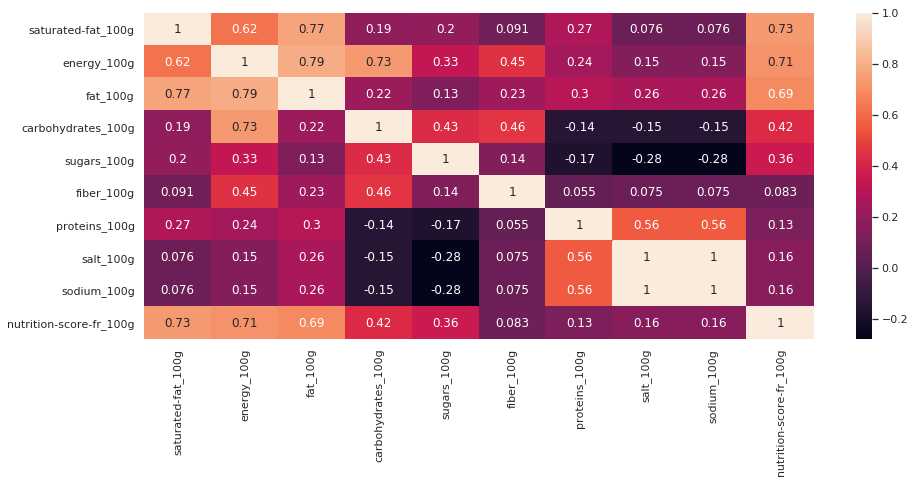

In [50]:
# Correlation entre les variables standardiées
plt.figure(figsize=(15, 6))
corr_df_acp = df_acp.corr()
sns.heatmap(corr_df_acp, annot=True)
plt.show()

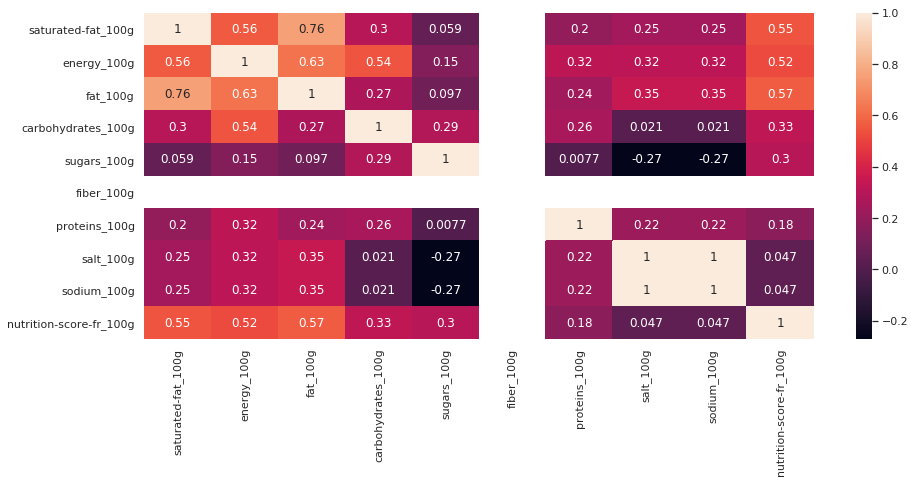

In [51]:
# Correlation entre les variables standardiées
plt.figure(figsize=(15, 6))
corr_df_acp_mediane = df_acp_mediane.corr()
sns.heatmap(corr_df_acp_mediane, annot=True)
plt.show()

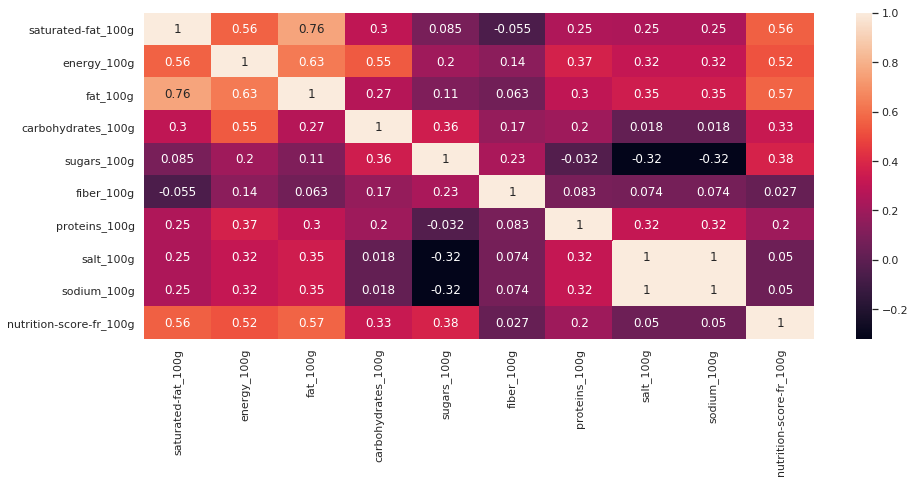

In [52]:
# Correlation entre les variables standardiées
plt.figure(figsize=(15, 6))
corr_df_acp_moyenne = df_acp_moyenne.corr()
sns.heatmap(corr_df_acp_moyenne, annot=True)
plt.show()

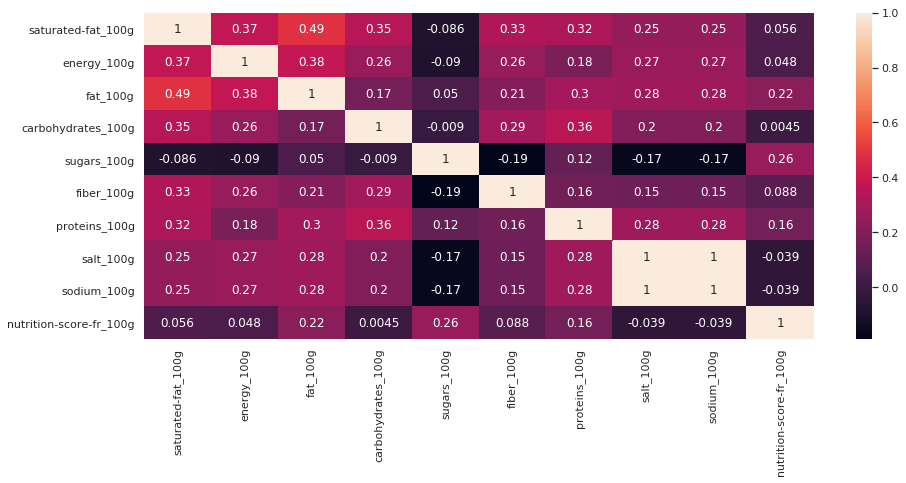

In [53]:
# Correlation entre les variables standardiées
plt.figure(figsize=(15, 6))
corr_df_acp_zero = df_acp_zero.corr()
sns.heatmap(corr_df_acp_zero, annot=True)
plt.show()

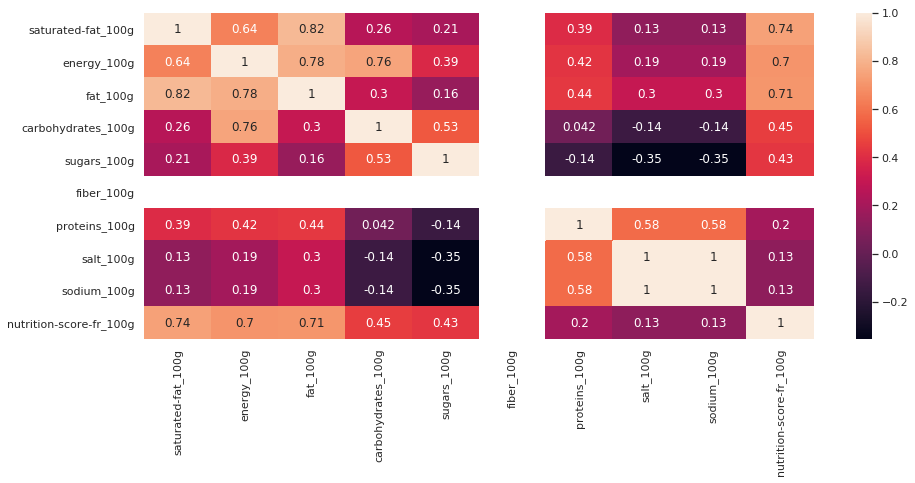

In [54]:
# Correlation entre les variables standardiées
plt.figure(figsize=(15, 6))
corr_df_acp_limites= df_acp_limites.corr()
sns.heatmap(corr_df_acp_limites, annot=True)
plt.show()

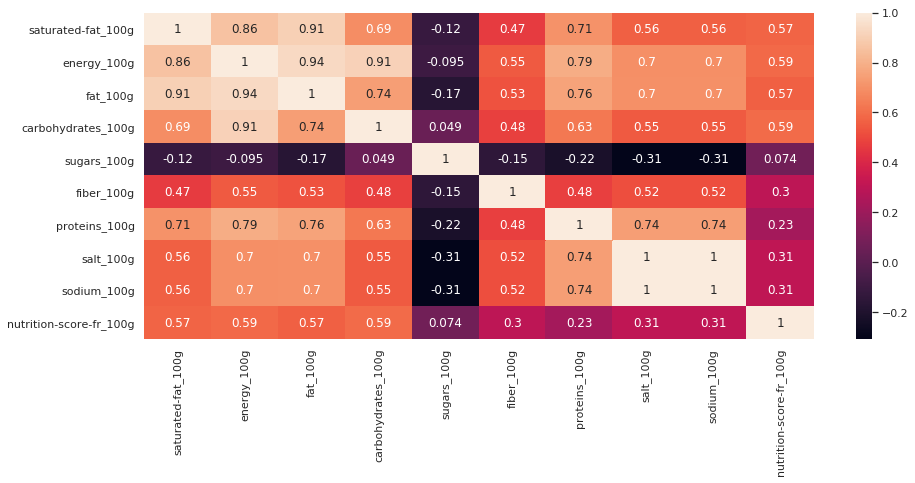

In [55]:
# Correlation entre les variables standardiées
plt.figure(figsize=(15, 6))
corr_df_cleaned = df_cleaned.corr()
sns.heatmap(corr_df_cleaned, annot=True)
plt.show()

Pour notre ACP, on retient le jeu de données dont les outliers ont été supprimés

# ACP
- Standardisation des données
- Choix de nombre de dimensions
- Qualité de projection
- Interprétation

Nous allons appliquer l'ACP et quelques une de ses variantes pour mieux séléctionner les axes de projections pour notre jeu de données nettoyé et standardisé : X_scaled.

#####  Nos jeux de données :
- df_acp : données initiales avec des outliers
- df_acp_mediane : les outliers remplacés  par la médiane
- df_acp_moyenne : les outliers remplacés par la moyenne
- df_acp_zero : les outliers remplacés par zero
- df_acp_limites : les outliers remplacés par les limites inf et supp
- df_cleaned : les outliers remplacés supprimés les outliers

In [56]:
def df_filtred_100g(df):
    return df.filter(regex='_100g')

In [57]:
def getParams(df):
    return df.values, df.index, df.columns

- Afficher les valeurs de quantité
- Le code suivant permet d'afficher les valeurs de quantité pour chaque nutrition, rangées par les moyennes

In [58]:
def afficherQuantitéNutritionnelle(df):
    sort_by_mean = df.mean().sort_values(ascending=True)
    df[sort_by_mean.index].plot(kind='box', figsize=(15, 4), rot=90, ylabel='Quantité (mg)')

In [60]:
def centrage_reduction(df):
    std_scale = preprocessing.StandardScaler().fit(df)
    X_scaled = std_scale.transform(df)
    df_X_scaled = pd.DataFrame(X_scaled, index=df.index, columns=df.columns)
    return X_scaled, df_X_scaled

In [61]:
pca_nutrition = df_filtred_100g(df_acp_limites)

In [62]:
X, names, features = getParams(pca_nutrition)

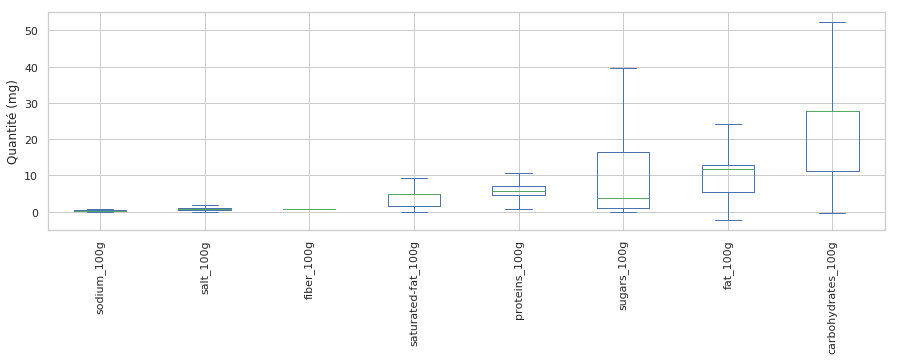

In [63]:
afficherQuantitéNutritionnelle(pca_nutrition.drop(['nutrition-score-fr_100g','energy_100g'], axis=1))

Pour certains nutriments les quantités varient beaucoup, pour d’autres non. Les plages de valeurs sont différentes d’un nutriment à l’autre. Cette situation peut impacter fortement l’analyse en composantes principales (ACP) qui est principalement basée sur la variance. Les nutiments avec une forte variance absolue auront plus de poids dans l’analyse que ceux avec une faible variance. Pour cette raison, **les données doivent être obligatoirement normalisées (standardisées)** avant l’analyse.

###### Standardisation des données

In [64]:
X_scaled,  df_X_scaled = centrage_reduction(pca_nutrition)

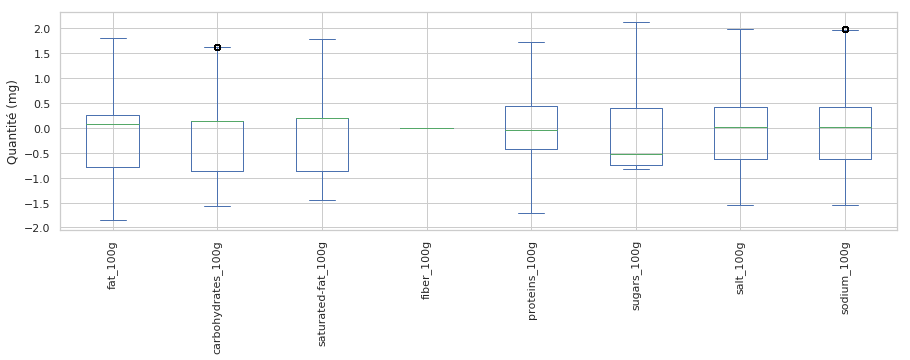

In [65]:
afficherQuantitéNutritionnelle(df_X_scaled.drop(['nutrition-score-fr_100g','energy_100g'], axis=1))

'carbohydrates_100g' et 'sodium_100g' présentent des outliers, on les supprime

In [153]:
# Par Défaut, le nbre de facteurs = nbre de variables
n_comp = df_X_scaled.shape[1]

In [154]:
n_comp

10

###### Choix du nombre d'axes :
- 1 : Par défaut
- 2 : Pourcentage de la variance expliquée
- 3 : Méthode d'Eboulis

In [67]:
# Choix par défaut
pca_1 = PCA()
pca_1.fit(X_scaled)
cumsum = np.cumsum(pca_1.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [68]:
print(d ,' composantes expliquent plus de 95% de la variance')

5  composantes expliquent plus de 95% de la variance


In [69]:
# Pourcentage de la variance expliquée(= 0.95)
pca_2 = PCA(n_components=0.95)
X_reduced = pca_2.fit_transform(X_scaled)

In [70]:
print(pca_2.n_components_ ,' composantes expliquent ' ,np.sum(pca_2.explained_variance_ratio_), ' de la variance')

5  composantes expliquent  0.9549500082476733  de la variance


### Le diagramme eboulis des valeurs propres :
- C'est qui décrit le pourcentage d’inertie totale associé à chaque axe.
- Represente la somme cumulée des inerties, c’est une courbe qui part de l’origine avec 38%  de pourcentage d'inertie pour l'axe1, ensuite 60% pour l'axe2  et qui arrive à 100 % après avoir parcouru tous les axes.
- En tout on a 10 axe

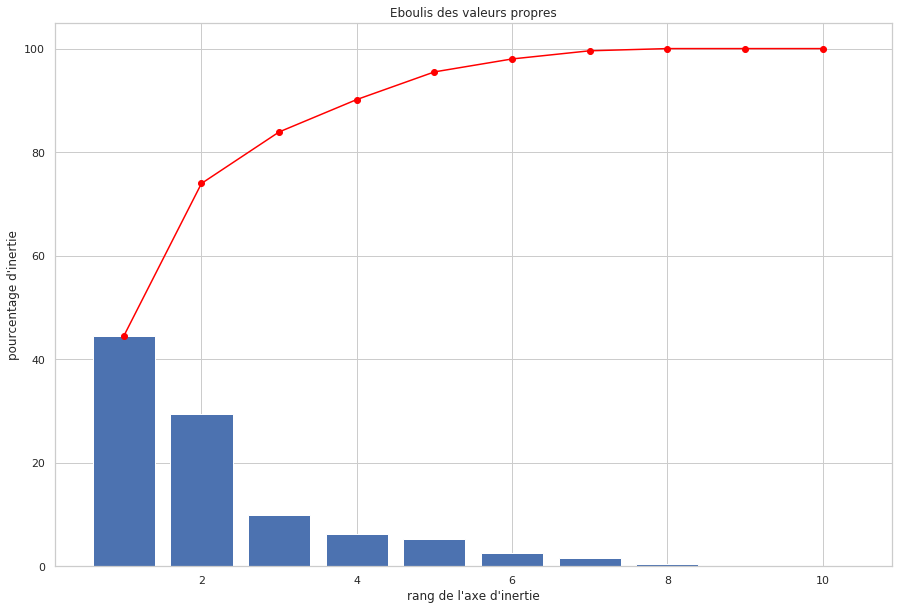

In [71]:
# Calcul des composantes principales (9 composents)
pca_3 = decomposition.PCA(n_components= n_comp)
pca_3.fit(X_scaled)
# Eboulis des valeurs propres
display_scree_plot(pca_3)

Les 3 méthodes suggerent 5 composantes pour avoir plus de 95% de variance totale

###### Calcul de l'ACP

In [72]:
# PCA par défaut
pca = PCA(n_components=5) # instanciation de l'objet pca
X_reduced = pca.fit_transform(X_scaled) # réalisation de l'ACP sur les données X_scaled

In [78]:
X_reduced.shape[1]

5

- Les valeurs de la variance expliquée par composante sont disponibles dans l’attribut `pca.explained_variance_ratio_` après le calcul de l'ACP.

In [77]:
pca.explained_variance_ratio_

array([0.4448457 , 0.29462966, 0.09947733, 0.06258817, 0.05340915])

In [76]:
pca.explained_variance_ratio_.sum()

0.9549500082476737

In [88]:
print('Variance expliquée avec F1 et F2 : ',explained_variance['F1'] + explained_variance['F2'])
print('Variance expliquée avec F1 et F2 et F3: ',explained_variance['F1'] + explained_variance['F2'] + explained_variance['F3'])

Variance expliquée avec F1 et F2 :  73.94753609112544
Variance expliquée avec F1 et F2 et F3:  83.89526903047373


In [79]:
# Conversion en dataframe pandas
def conversionVarianceDF(X_reduced):
    pca_columns = ['F' + str(c) for c in range(1, X_reduced.shape[1]+1, 1)] # création d'une liste avec les noms de colonnes de PC1 à PC50
    X_pca = pd.DataFrame(X_reduced, index=names, columns=pca_columns) # création du dataframe
    return X_pca

In [84]:
df_X_pca = conversionVarianceDF(X_reduced)
df_X_pca.head()

F1        F2        F3        F4        F5
code                                                      
40608754 -3.195756  1.590847  0.690781  0.973310  0.082272
87177756 -3.136297  1.437555  0.617492  1.067476  0.092812
10        1.943552  1.489324 -1.258362 -0.415336  0.408861
30        1.677553  1.605686 -1.386518 -0.194865  0.228240
31        1.144221  1.945952 -1.682953  0.100784 -0.030994

In [85]:
explained_variance = pd.Series(dict(zip(df_X_pca.columns, 100.0*pca.explained_variance_ratio_)))
print(explained_variance.head())

F1    44.484570
F2    29.462966
F3     9.947733
F4     6.258817
F5     5.340915
dtype: float64


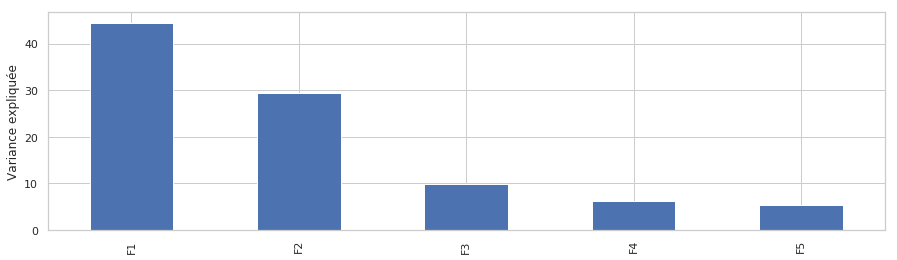

In [86]:
explained_variance.plot(kind='bar', figsize=(15, 4), rot=90, ylabel='Variance expliquée')

- Contribution des individus à l'inértie de l'axe sur lequel sont projetés

In [93]:
print('Contribution des individus à l\'inértie de l\'axe sur lequel sont projetés')
df_X_pca.head()

Contribution des individus à l'inértie de l'axe sur lequel sont projetés


F1        F2        F3        F4        F5
code                                                      
40608754 -3.195756  1.590847  0.690781  0.973310  0.082272
87177756 -3.136297  1.437555  0.617492  1.067476  0.092812
10        1.943552  1.489324 -1.258362 -0.415336  0.408861
30        1.677553  1.605686 -1.386518 -0.194865  0.228240
31        1.144221  1.945952 -1.682953  0.100784 -0.030994

In [108]:
index_F1_upper5 = df_X_pca[df_X_pca['F1'] > 5.00].index

In [109]:
pca_nutrition.loc[index_F1_upper5]

saturated-fat_100g  energy_100g  fat_100g  carbohydrates_100g  \
code                                                                           
34000003341              9.381774       1858.0     24.25           52.282377   
26033174                 9.381774       1780.0     14.00           52.282377   
3106130008033            9.381774       1770.0     18.10           52.282377   
3106130040750            9.381774       1858.0     24.25           46.000000   
3162900001109            9.381774       1858.0     24.25           43.000000   
3171910661104            9.381774       1858.0     24.25           52.282377   
3222471029893            9.381774       1858.0     24.25           52.282377   
3254560030657            9.381774       1858.0     24.25           52.282377   
3263853004510            9.381774       1858.0     24.25           52.282377   
3350031507649            9.381774       1858.0     24.25           45.000000   
3350033203150            9.381774       1858.0     24.25           52.282377   
3560070326501            8.700000       1858.0     21.00           52.282377   
3560070434893            9.381774       1858.0     24.25           39.000000   
3560070759385            9.381774       1858.0     24.25           52.282377   
3588570002695            9.381774       1858.0     24.25           50.300000   
3596710408009            9.381774       1858.0     24.25           38.700000   
3760122966147            9.381774       1858.0     24.25           52.282377   
7622300822965            9.381774       1858.0     17.00           52.282377   

               sugars_100g  fiber_100g  proteins_100g  salt_100g  sodium_100g  \
code                                                                            
34000003341          39.75         0.9          10.75     1.0000     0.393701   
26033174             39.75         0.9          10.75     1.6256     0.640000   
3106130008033        39.75         0.9          10.75     1.7950     0.706693   
3106130040750        20.00         0.9          10.00     1.7950     0.706693   
3162900001109        14.00         0.9           9.10     1.7950     0.706693   
3171910661104        28.00         0.9           7.50     1.7950     0.706693   
3222471029893        32.00         0.9           7.60     1.6000     0.629921   
3254560030657        39.75         0.9           8.20     1.3462     0.530000   
3263853004510         3.60         0.9          10.75     1.7950     0.706693   
3350031507649        14.00         0.9           9.50     1.7950     0.706693   
3350033203150         1.00         0.9          10.75     1.7950     0.706693   
3560070326501        39.75         0.9           7.20     1.7950     0.706693   
3560070434893        14.00         0.9          10.75     1.7950     0.706693   
3560070759385        39.75         0.9           4.70     1.7950     0.706693   
3588570002695        15.10         0.9           8.10     1.7950     0.706693   
3596710408009        13.60         0.9          10.75     1.7950     0.706693   
3760122966147        32.50         0.9           6.50     1.7272     0.680000   
7622300822965        39.75         0.9          10.75     1.2700     0.500000   

               nutrition-score-fr_100g  
code                                    
34000003341                       29.0  
26033174                          32.0  
3106130008033                     32.0  
3106130040750                     27.0  
3162900001109                     29.0  
3171910661104                     28.0  
3222471029893                     29.0  
3254560030657                     31.0  
3263853004510                     26.0  
3350031507649                     29.0  
3350033203150                     26.0  
3560070326501                     32.0  
3560070434893                     28.0  
3560070759385                     32.0  
3588570002695                     29.0  
3596710408009                     28.0  
3760122966147                     28.0  
7622300822965 

In [110]:
df_acp_limites.loc[index_F1_upper5]

saturated-fat_100g  energy_100g  fat_100g  carbohydrates_100g  \
code                                                                           
34000003341              9.381774       1858.0     24.25           52.282377   
26033174                 9.381774       1780.0     14.00           52.282377   
3106130008033            9.381774       1770.0     18.10           52.282377   
3106130040750            9.381774       1858.0     24.25           46.000000   
3162900001109            9.381774       1858.0     24.25           43.000000   
3171910661104            9.381774       1858.0     24.25           52.282377   
3222471029893            9.381774       1858.0     24.25           52.282377   
3254560030657            9.381774       1858.0     24.25           52.282377   
3263853004510            9.381774       1858.0     24.25           52.282377   
3350031507649            9.381774       1858.0     24.25           45.000000   
3350033203150            9.381774       1858.0     24.25           52.282377   
3560070326501            8.700000       1858.0     21.00           52.282377   
3560070434893            9.381774       1858.0     24.25           39.000000   
3560070759385            9.381774       1858.0     24.25           52.282377   
3588570002695            9.381774       1858.0     24.25           50.300000   
3596710408009            9.381774       1858.0     24.25           38.700000   
3760122966147            9.381774       1858.0     24.25           52.282377   
7622300822965            9.381774       1858.0     17.00           52.282377   

               sugars_100g  fiber_100g  proteins_100g  salt_100g  sodium_100g  \
code                                                                            
34000003341          39.75         0.9          10.75     1.0000     0.393701   
26033174             39.75         0.9          10.75     1.6256     0.640000   
3106130008033        39.75         0.9          10.75     1.7950     0.706693   
3106130040750        20.00         0.9          10.00     1.7950     0.706693   
3162900001109        14.00         0.9           9.10     1.7950     0.706693   
3171910661104        28.00         0.9           7.50     1.7950     0.706693   
3222471029893        32.00         0.9           7.60     1.6000     0.629921   
3254560030657        39.75         0.9           8.20     1.3462     0.530000   
3263853004510         3.60         0.9          10.75     1.7950     0.706693   
3350031507649        14.00         0.9           9.50     1.7950     0.706693   
3350033203150         1.00         0.9          10.75     1.7950     0.706693   
3560070326501        39.75         0.9           7.20     1.7950     0.706693   
3560070434893        14.00         0.9          10.75     1.7950     0.706693   
3560070759385        39.75         0.9           4.70     1.7950     0.706693   
3588570002695        15.10         0.9           8.10     1.7950     0.706693   
3596710408009        13.60         0.9          10.75     1.7950     0.706693   
3760122966147        32.50         0.9           6.50     1.7272     0.680000   
7622300822965        39.75         0.9          10.75     1.2700     0.500000   

               nutrition-score-fr_100g  pnns_groups_1  \
code                                                    
34000003341                       29.0  Sugary snacks   
26033174                          32.0      Beverages   
3106130008033                     32.0   Salty snacks   
3106130040750                     27.0   Salty snacks   
3162900001109                     29.0   Salty snacks   
3171910661104                     28.0  Sugary snacks   
3222471029893                     29.0  Sugary snacks   
3254560030657                     31.0  Sugary snacks   
3263853004510                     26.0   Salty snacks   
3350031507649                     29.0   Salty snacks   
3350033203150                     26.0   Salty snacks   
3560070326501                     32.0   Salty snack

In [121]:
index_F2_upper5 = df_X_pca[df_X_pca['F2'] > 4.2].index
index_F2_upper5

Int64Index([3263852662193, 4018077752605, 5400247019509], dtype='int64', name='code')

In [122]:
df_acp_limites.loc[index_F2_upper5]

saturated-fat_100g  energy_100g  fat_100g  carbohydrates_100g  \
code                                                                           
3263852662193            9.381774       1858.0     23.00           52.282377   
4018077752605            9.381774       1780.0     14.00           52.282377   
5400247019509            9.000000       1858.0     24.25           52.282377   

               sugars_100g  fiber_100g  proteins_100g  salt_100g  sodium_100g  \
code                                                                            
3263852662193        39.75         0.9            1.0       0.02     0.007874   
4018077752605        39.75         0.9            2.2       0.00     0.000000   
5400247019509        39.75         0.9            2.0       0.01     0.003937   

               nutrition-score-fr_100g  pnns_groups_1  \
code                                                    
3263852662193                     22.0  Sugary snacks   
4018077752605                     25.0   Salty snacks   
5400247019509                     25.0  Sugary snacks   

                                product_name        brands countries_fr  \
code                                                                      
3263852662193                Rochers de coco  Leader Price       France   
4018077752605       Apérifruits - L'Exotique          Vico       France   
5400247019509  Pâte à tartiner aux noisettes         Winny       France   

                                                ingredients_text  \
code                                                               
3263852662193  noix de coco 31%, sucre, sirop de glucose, bla...   
4018077752605  Raisins 31%, sucre, papaye 14%, noix de coco 1...   
5400247019509  Sucre, huiles végétales (huile de navette, hui...   

              nutrition_grade_fr nutrition-grade-fr_1  
code                                                   
3263852662193                  e                    b  
4018077752605                  e                    b  
5400247019509                  e                    b

- Contribution des variables à l'inértie de l'axe sur lequel sont projetés

In [97]:
pcs = pca.components_
print('Contribution des variables à l\'inértie de l\'axe sur lequel sont projetées')
contrib_vars = pd.DataFrame(pcs, columns=features, index=['F1','F2','F3','F4','F5']).T
contrib_vars

Contribution des variables à l'inértie de l'axe sur lequel sont projetées


F1        F2        F3            F4  \
saturated-fat_100g       0.410131  0.062555  0.511339 -5.302961e-02   
energy_100g              0.453511  0.133921 -0.222265 -2.240887e-01   
fat_100g                 0.445259 -0.012313  0.316184 -4.086247e-02   
carbohydrates_100g       0.268850  0.330726 -0.587648 -2.105404e-01   
sugars_100g              0.155186  0.436841 -0.278929  3.829347e-01   
fiber_100g              -0.000000  0.000000  0.000000 -1.110223e-16   
proteins_100g            0.284633 -0.329883 -0.085512 -5.984402e-01   
salt_100g                0.202031 -0.520859 -0.249020  3.199597e-01   
sodium_100g              0.202030 -0.520859 -0.249023  3.199594e-01   
nutrition-score-fr_100g  0.410917  0.162416  0.186253  4.375582e-01   

                                   F5  
saturated-fat_100g      -5.211116e-02  
energy_100g              2.079765e-01  
fat_100g                 1.569122e-01  
carbohydrates_100g       3.527830e-01  
sugars_100g             -6.847314e-01  
fiber_100g               3.330669e-16  
proteins_100g           -5.758505e-01  
salt_100g                3.581333e-02  
sodium_100g              3.581541e-02  
nutrition-score-fr_100g  4.389276e-02

On remarque que 'fiber_100g' est négativement corrélée avec F1, et n'a aucune liason avec les autres facteurs

### Visualisation

In [133]:
calculModalites(df_acp_limites,'pnns_groups_1')

Nbre Modalité
Modalités                             
Beverages                         2788
Cereals and potatoes              3616
Composite foods                   4406
Fat and sauces                    1994
Fish Meat Eggs                    3625
Fruits and vegetables             2532
Milk and dairy products           3837
Salty snacks                      1406
Sugary snacks                     5947
cereals-and-potatoes                 1
unknown                           4519

- Préparation des plans de projections

In [156]:
F0_plans_1 = [(0,1),(0,2)]
F0_plans_2 = [(0,3),(0,4)]
F0_plans_3 = [(0,5)]
F1_plans_1 = [(1,2),(1,3)]
F1_plans_2 = [(1,4),(1,5)]
F2_plans_1 = [(2,3),(2,4)]
F2_plans_2 = [(2,5)]
F3_plans = [(3,4),(3,5)]
F4_plans = [(4,5)]
F1_plans_4 = [(1,4)]
F3_plans_4 = [(3,4)]

grade = df_acp_limites.loc[:,'nutrition_grade_fr']
ppn = df_acp_limites.loc[:,'pnns_groups_1']
#Sans outliers
grade_ = df_acp_limites.loc[:,'nutrition_grade_fr']
ppn_ = df_acp_limites.loc[:,'pnns_groups_1']

# le nutrigrade de chaque produit(ABCDE)
grade_c = df_acp_limites[df_acp_limites['nutrition_grade_fr'] == 'c'].loc[:,'nutrition_grade_fr']
#Sans outliers
grade_c_ = df_acp_limites[df_acp_limites['nutrition_grade_fr'] == 'c'].loc[:,'nutrition_grade_fr']

n_comp = df_acp_limites.shape[1]

y = df_acp_limites['nutrition_grade_fr']

In [157]:
y_nutrition_grade_fr = df_acp_limites['nutrition_grade_fr']
y_pnns_groups_1 = df_acp_limites['pnns_groups_1']
#y_nutrition-grade-fr_1 = df_acp_limites['nutrition-grade-fr_1']
y_brands = df_acp_limites['brands']
y_product_name = df_acp_limites['product_name']

In [135]:
dict_colors_grades = {'a': 'forestgreen', 'b': 'royalblue', 'c': 'orange', 'd': 'crimson', 'e': 'green'} 
y_colors = [dict_colors_grades[yi] for yi in y_nutrition_grade_fr]

Text(0.5, 0.92, 'Distributions des 3 premiéres composantes en 3D')

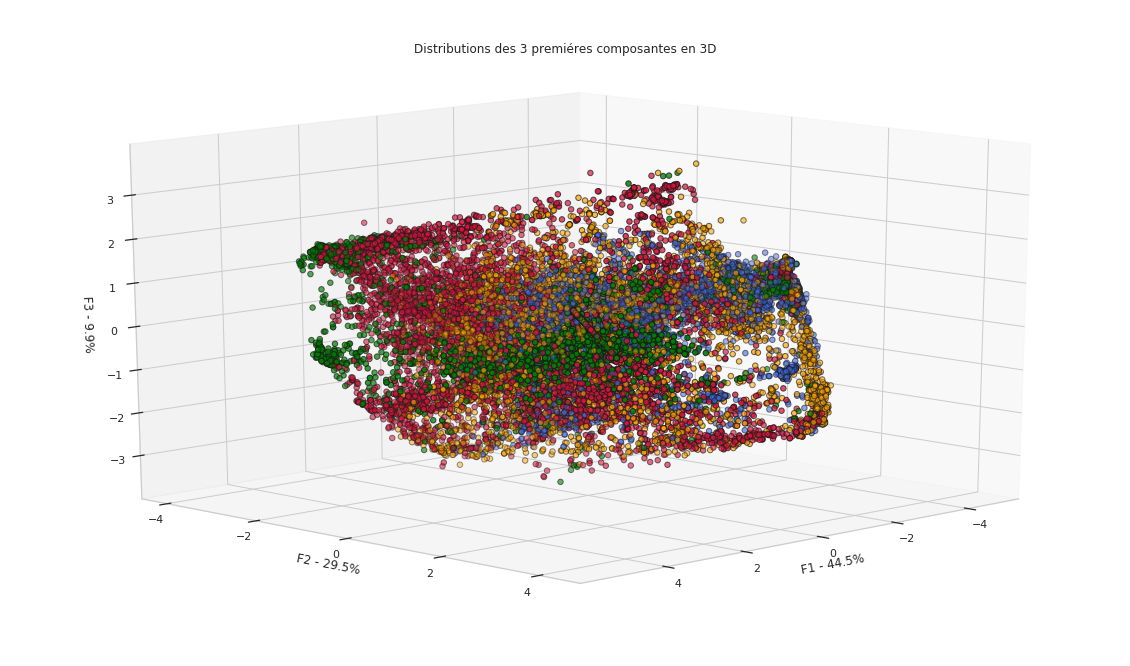

In [136]:
fig = plt.figure(figsize=(20, 12))
#ax = fig.add_subplot(projection='3d')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_X_pca['F1'], df_X_pca['F2'], df_X_pca['F3'], marker='o', s=30, edgecolor='k', facecolor=y_colors)
ax.set_xlabel('F1 - ' + '{:.1f}%'.format(explained_variance['F1']))
ax.set_ylabel('F2 - ' + '{:.1f}%'.format(explained_variance['F2']))
ax.set_zlabel('F3 - ' + '{:.1f}%'.format(explained_variance['F3']))
ax.view_init(elev=15, azim=45)
ax.set_title("Distributions des 3 premiéres composantes en 3D")

Text(0.5, 0.92, 'Distributions des 2 premiéres composantes en 3D')

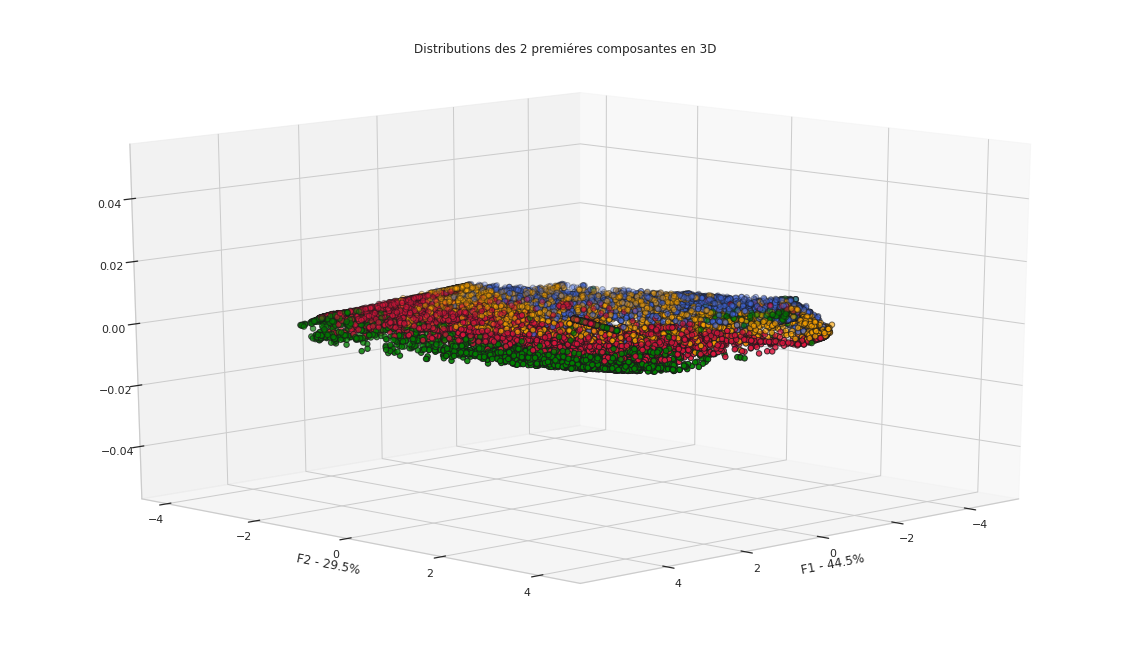

In [147]:
fig = plt.figure(figsize=(20, 12))
#ax = fig.add_subplot(projection='3d')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_X_pca['F1'], df_X_pca['F2'], marker='o', s=30, edgecolor='k', facecolor=y_colors)
ax.set_xlabel('F1 - ' + '{:.1f}%'.format(explained_variance['F1']))
ax.set_ylabel('F2 - ' + '{:.1f}%'.format(explained_variance['F2']))

ax.view_init(elev=15, azim=45)
ax.set_title("Distributions des 2 premiéres composantes en 3D")

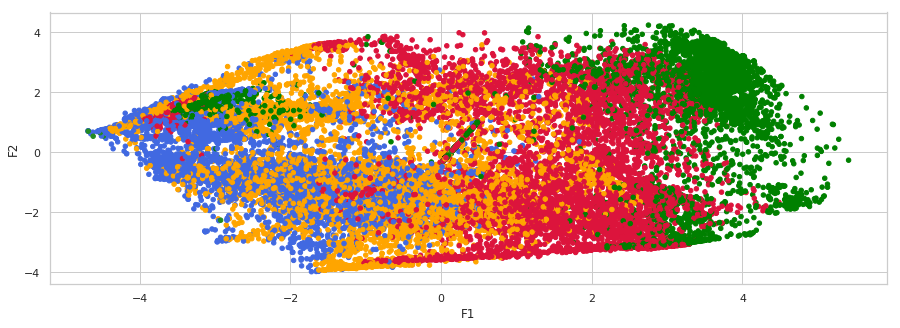

In [148]:
df_X_pca.plot(x='F1', y='F2', kind='scatter', figsize=(15, 5), color=y_colors)

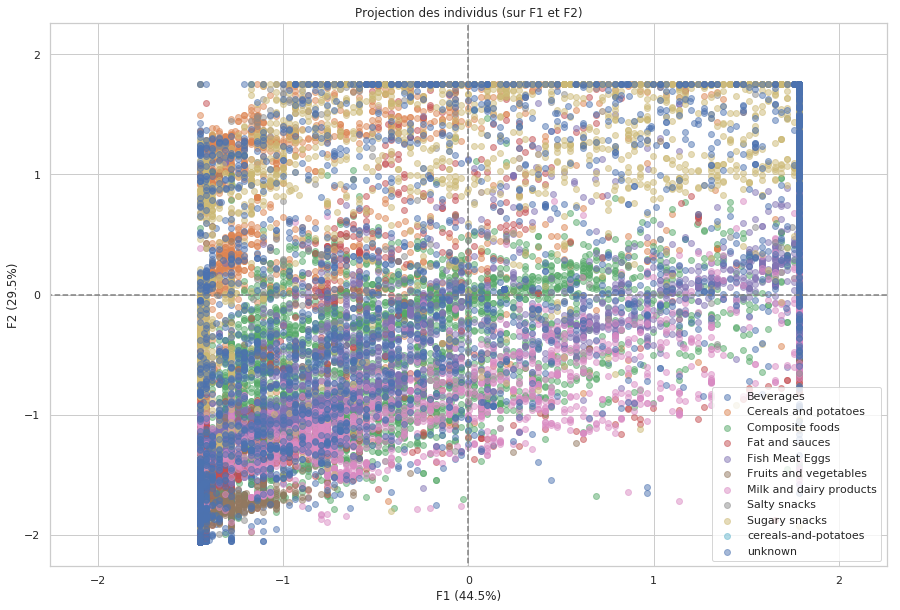

In [155]:
dessiner_projection_plans([(0,1)], ppn, pca, X_scaled)

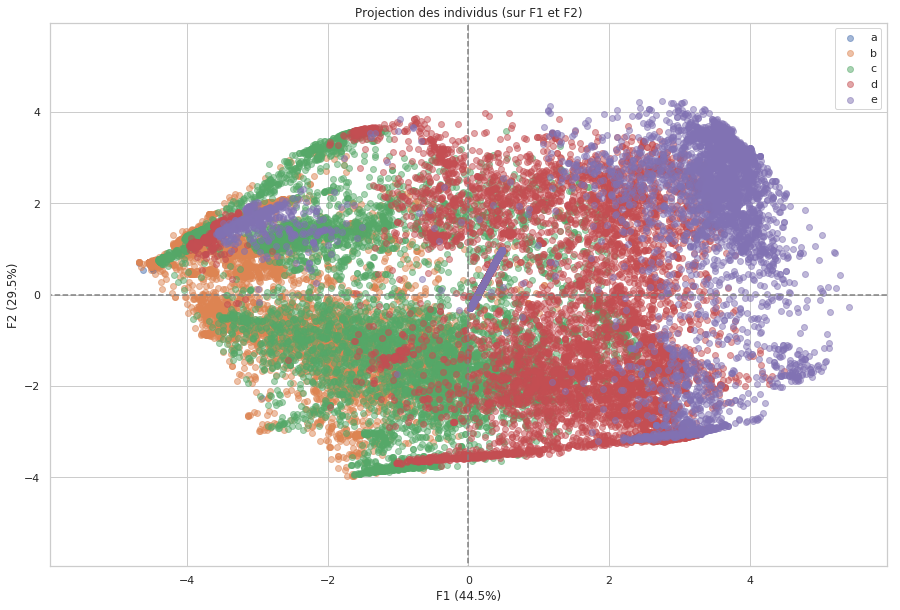

In [179]:
dessiner_projection_plans([(0,1)],grade,pca,X_reduced)

### Cercle de corrélations

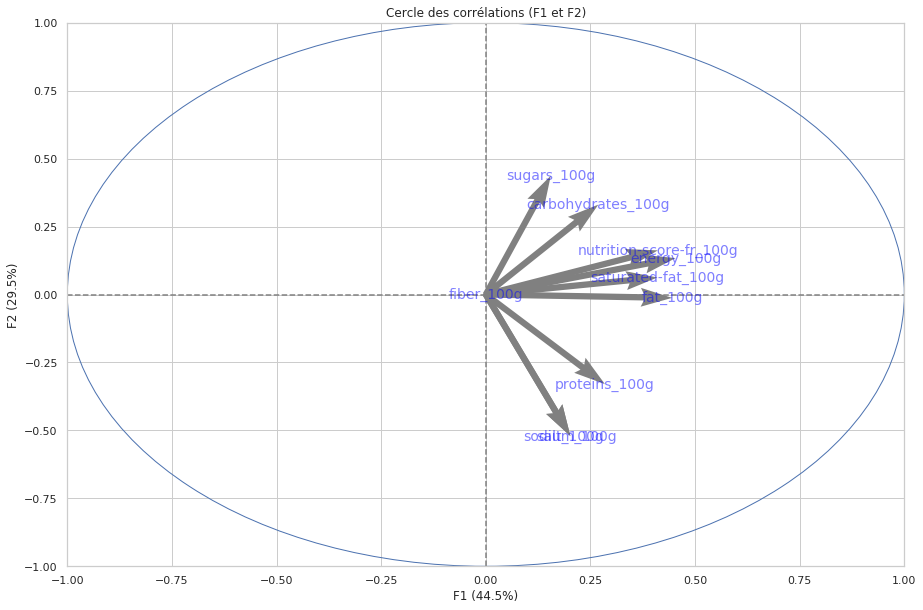

In [144]:
dessiner_plans([(0,1)], pca)

### La méthode t-SNE

La méthode **t-SNE** (t-distributed stochastic neighbor embedding) fait partie de la librairie `scikit-learn`.

In [204]:
tsne_1 = TSNE(n_components=3, init='pca', random_state=0, n_jobs=-1)
X_tsne_1 = tsne_1.fit_transform(X_scaled)

/home/mel/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/home/mel/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


In [205]:
df_X_tsne_1 = conversionVarianceDF(X_tsne_1)
df_X_tsne_1.head()

F1         F2         F3
code                                     
40608754 -16.435875  19.847397  12.742608
87177756 -15.357434  19.872795  13.988542
10        22.424862   8.160744 -15.340837
30        20.876270   7.518840 -15.401505
31        18.623705   7.617455 -14.355968

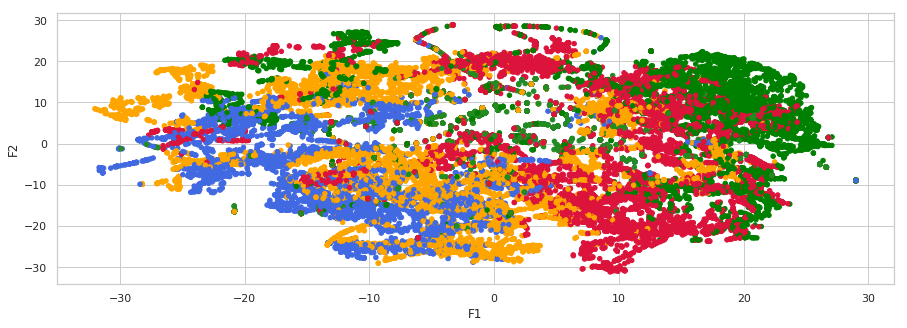

In [206]:
df_X_tsne_1.plot(x='F1', y='F2', kind='scatter', figsize=(15, 5), color=y_colors)

In [225]:
#dessiner_plans([(0,1)], tsne_1)

In [207]:
# La divergence de Kullback-Leibler après optimisation
tsne_1.kl_divergence_

0.7244046330451965

In [208]:
tsne_2 = TSNE(n_components=3, init='pca', perplexity=45, random_state=0, n_jobs=-1)
X_tsne_2 = tsne_2.fit_transform(X_scaled)

/home/mel/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/home/mel/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


In [209]:
tsne_2.kl_divergence_

0.634570837020874

In [210]:
df_X_tsne_2 = conversionVarianceDF(X_tsne_2)
df_X_tsne_2.head()

F1         F2         F3
code                                     
40608754 -19.342112  13.289499  14.985772
87177756 -17.991419  13.199003  14.984791
10        20.692781   5.947065 -13.139992
30        19.317135   5.713095 -13.279646
31        17.162746   6.038685 -12.851829

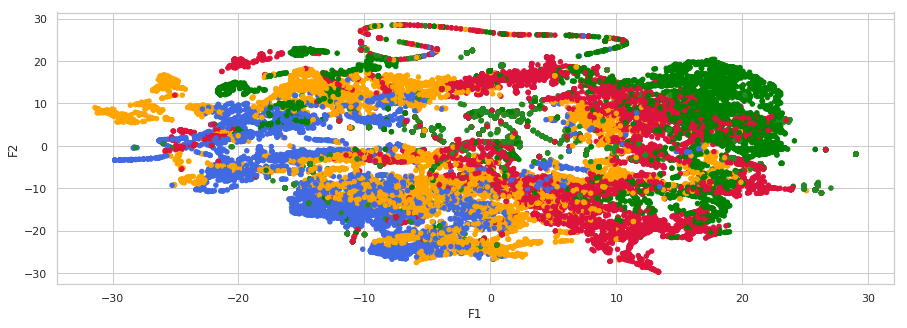

In [212]:
df_X_tsne_2.plot(x='F1', y='F2', kind='scatter', figsize=(15, 5), color=y_colors)

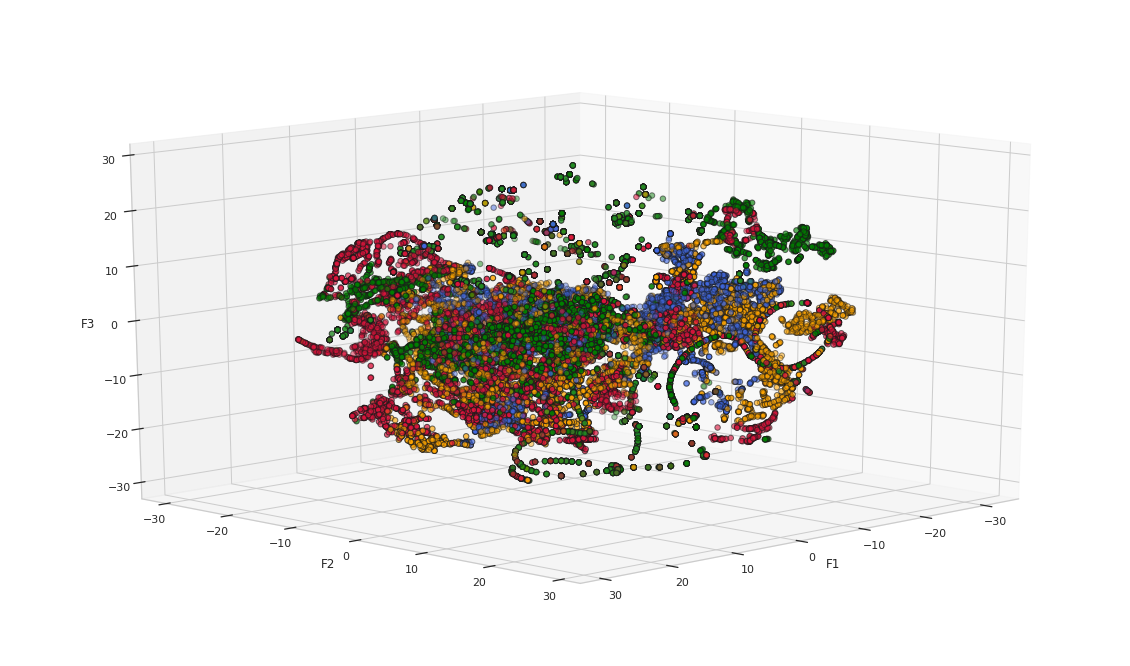

In [213]:
fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_X_tsne_2['F1'], df_X_tsne_2['F2'], df_X_tsne_2['F3'], marker='o', s=30, edgecolor='k', facecolor=y_colors)
ax.set_xlabel('F1')
ax.set_ylabel('F2')
ax.set_zlabel('F3')
ax.view_init(elev=15, azim=45)

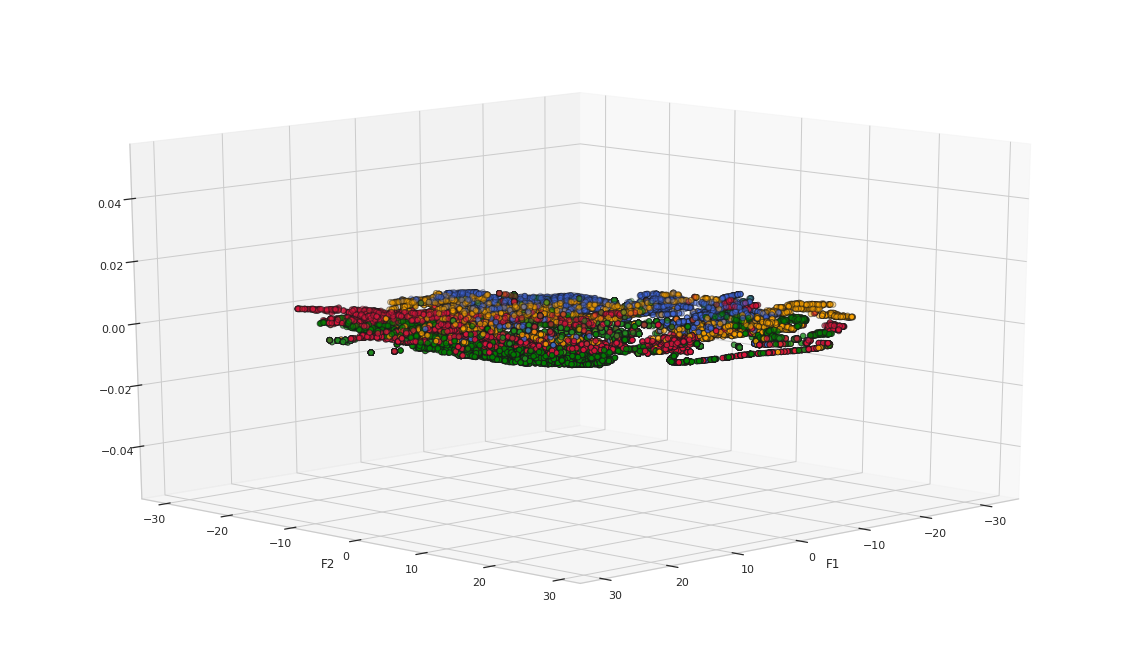

In [214]:
fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_X_tsne_2['F1'], df_X_tsne_2['F2'], marker='o', s=30, edgecolor='k', facecolor=y_colors)
ax.set_xlabel('F1')
ax.set_ylabel('F2')
ax.view_init(elev=15, azim=45)

# PCA Randomizée

In [228]:
rnd_pca = PCA(n_components=5, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_scaled)

In [229]:
rnd_pca.explained_variance_ratio_

array([0.4448457 , 0.29462966, 0.09947733, 0.06258817, 0.05340915])

In [230]:
pcs_ = rnd_pca.components_

In [231]:
df_X_pca = conversionVarianceDF(X_reduced)
df_X_pca.head()

F1        F2        F3        F4        F5
code                                                      
40608754 -3.195756  1.590847  0.690781  0.973310  0.082272
87177756 -3.136297  1.437555  0.617492  1.067476  0.092812
10        1.943552  1.489324 -1.258362 -0.415336  0.408861
30        1.677553  1.605686 -1.386518 -0.194865  0.228240
31        1.144221  1.945952 -1.682953  0.100784 -0.030994

In [232]:
pcs = rnd_pca.components_
print('Contribution des variables à l\'inértie de l\'axe sur lequel sont projetées')
contrib_vars = pd.DataFrame(pcs, columns=features, index=['F1','F2','F3','F4','F5']).T
contrib_vars

Contribution des variables à l'inértie de l'axe sur lequel sont projetées


F1        F2            F3            F4  \
saturated-fat_100g       0.410131  0.062555  5.113391e-01 -5.302961e-02   
energy_100g              0.453511  0.133921 -2.222654e-01 -2.240887e-01   
fat_100g                 0.445259 -0.012313  3.161842e-01 -4.086247e-02   
carbohydrates_100g       0.268850  0.330726 -5.876482e-01 -2.105404e-01   
sugars_100g              0.155186  0.436841 -2.789287e-01  3.829347e-01   
fiber_100g              -0.000000 -0.000000 -6.938894e-18 -1.110223e-16   
proteins_100g            0.284633 -0.329883 -8.551221e-02 -5.984402e-01   
salt_100g                0.202031 -0.520859 -2.490202e-01  3.199597e-01   
sodium_100g              0.202030 -0.520859 -2.490233e-01  3.199594e-01   
nutrition-score-fr_100g  0.410917  0.162416  1.862534e-01  4.375582e-01   

                                   F5  
saturated-fat_100g      -5.211116e-02  
energy_100g              2.079765e-01  
fat_100g                 1.569122e-01  
carbohydrates_100g       3.527830e-01  
sugars_100g             -6.847314e-01  
fiber_100g               1.110223e-16  
proteins_100g           -5.758505e-01  
salt_100g                3.581333e-02  
sodium_100g              3.581541e-02  
nutrition-score-fr_100g  4.389276e-02

### Cercle des corrélations

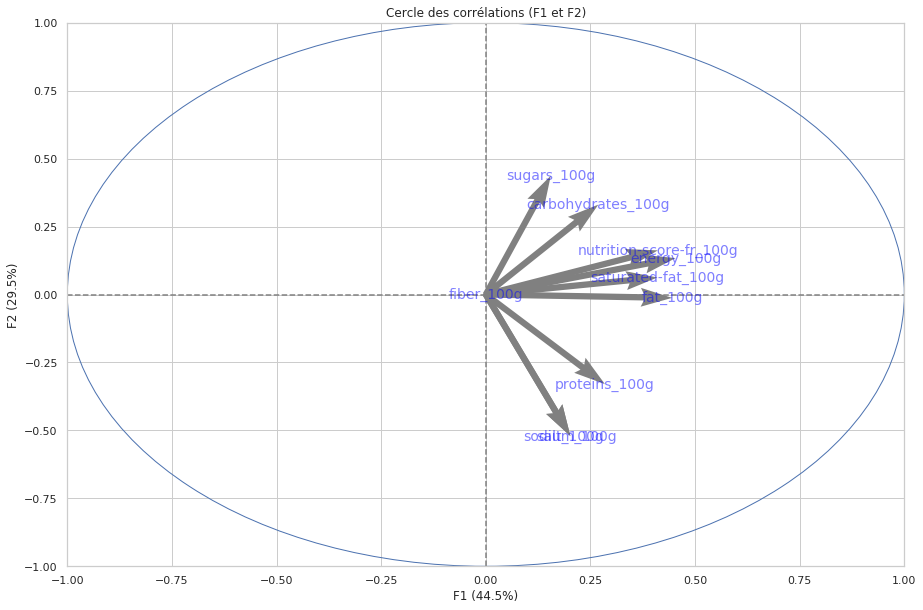

In [233]:
dessiner_plans([(0,1)], rnd_pca)

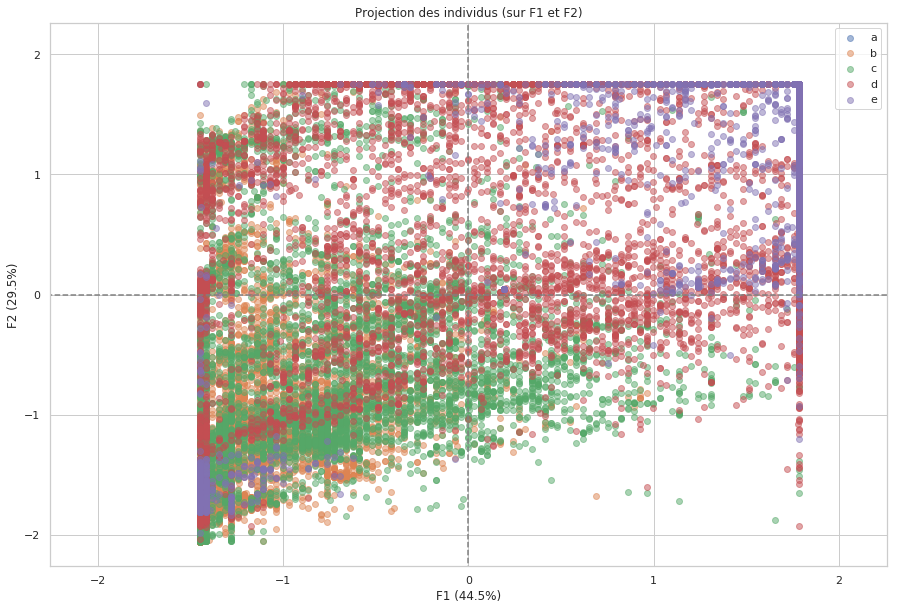

In [235]:
dessiner_projection_plans([(0,1)], grade, rnd_pca, X_scaled)

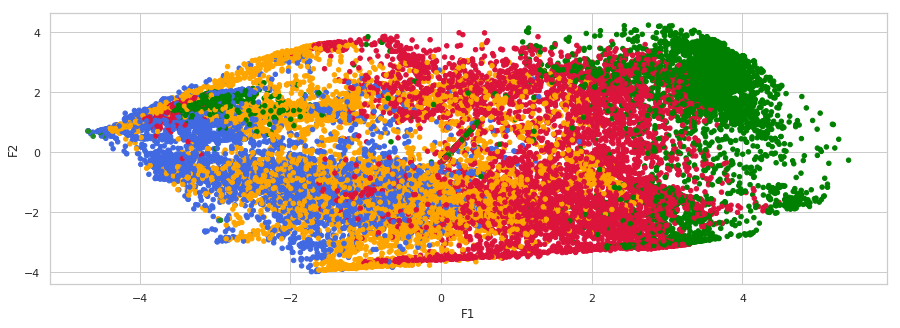

In [236]:
df_X_pca.plot(x='F1', y='F2', kind='scatter', figsize=(15, 5), color=y_colors)

- Commentaires :

# PCA Incrémental

In [130]:
from sklearn.decomposition import IncrementalPCA

n_batches = 10
inc_pca = IncrementalPCA(n_components=5)
for X_batch in np.array_split(X_scaled_, n_batches):
    print(".", end="") # not shown in the book
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.fit_transform(X_scaled_)

..........

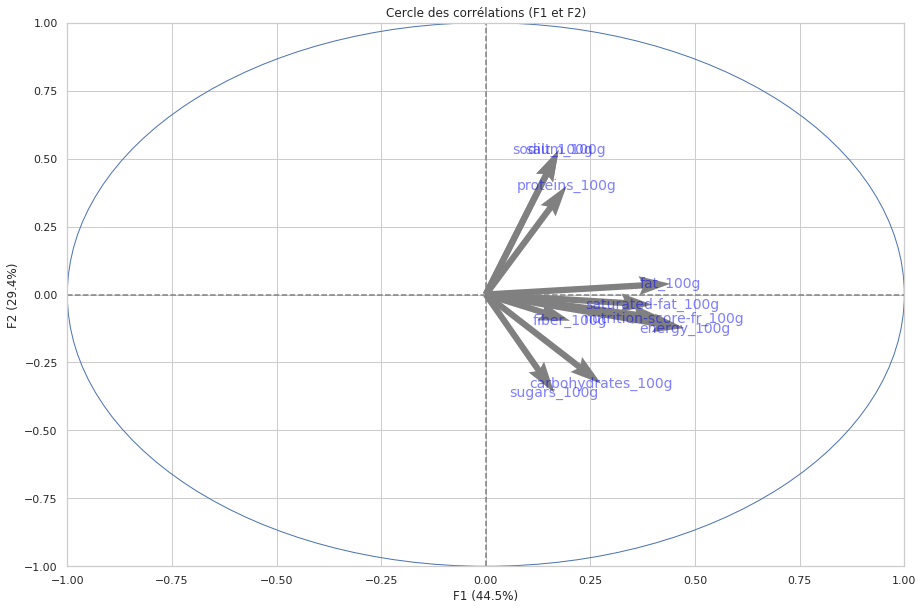

In [131]:
dessiner_plans([(0,1)], inc_pca)

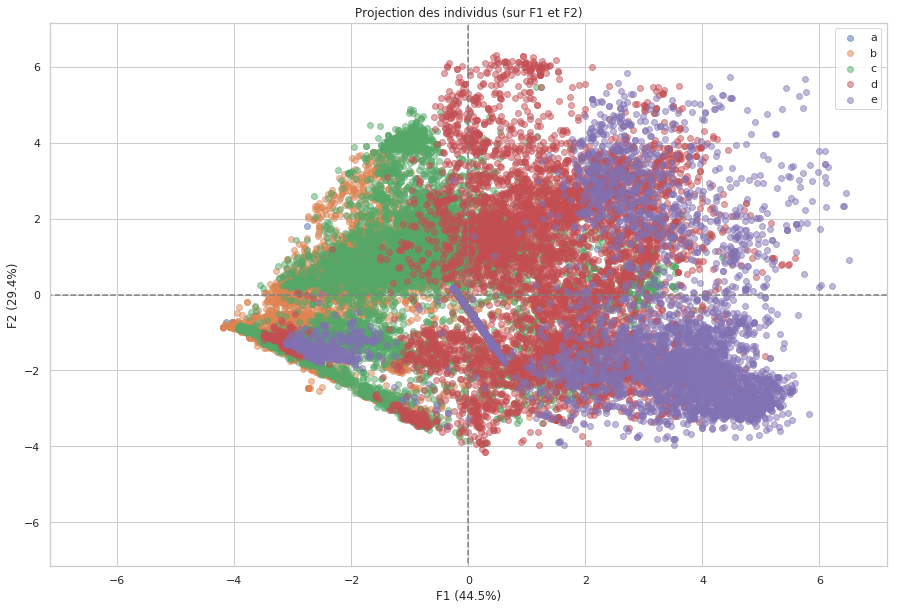

In [132]:
dessiner_projection_plans([(0,1)], grade, inc_pca)

#### Commentaires

# PCA à noyeau

In [214]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components = 5, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 5, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 5, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

In [ ]:
X_reduced_lin = lin_pca.fit_transform(X_scaled)

In [ ]:
X_reduced_rbf = rbf_pca.fit_transform(X_scaled)

In [ ]:
X_reduced_sig = sig_pca.fit_transform(X_scaled)

In [221]:
dessiner_plans([(0,1)], lin_pca)

In [ ]:
dessiner_projection_plans([(0,1)], grade, lin_pca)

In [ ]:
dessiner_plans([(0,1)], rbf_pca)

In [ ]:
dessiner_projection_plans([(0,1)], grade, rbf_pca)

In [ ]:
dessiner_plans([(0,1)], sig_pca)

In [ ]:
dessiner_projection_plans([(0,1)], grade, sig_pca)

In [ ]:
####### Commentaires

# PCA LLE

In [ ]:
eigen_solver{‘auto’, ‘dense’, ‘arpack’, ‘randomized’}

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=5, n_neighbors=10, random_state=42,eigen_solver = 'dense')
X_reduced = lle.fit_transform(X_scaled_)

 Analyse de la variance (ANOVA) est un test statistique utilisé pour comparer deux ou plusieurs moyennes ensemble, qui sont déterminées par l'analyse de la variance
 
 

Dans une ANOVA, on cherche à déterminer si les moyennes des groupes sont significativement différentes. On pose donc :

    H0 : Les moyennes de chaque groupe sont égales si p-value > 5%
    H1 : Les moyennes de chaque groupe ne sont pas toutes égales si p-value < 5%


    Pour l'analyse de la variance je me suis basé sur 3 variation:
    
    - la variation totale
    - la variation interclasse et 
    - la variation intraclasse
    Ensuite je calcule une statistique etat carré:
    si proche de 0: 
    il n'ya pas de relation entre les deux variables
    si proche de 1 :
    Les moyennes des classes est très different d'une classe à une autre mais qu'on sein d'une même classe leur valeur sont très peu dispercé autour de la moyenne de la classe. Donc une ort relation entre X et Y

In [84]:

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

def anova_most_col(data, X):
    #X = "pnns_groups_1" # qualitative
    X = X
    Y = data.filter(regex='_100g').columns# quantitative
    p = []
    feature = []
    for col in Y:     
        p.append(eta_squared(data[X],data[col]))
        feature.append(col)
    return(pd.DataFrame(np.column_stack([feature, p]), columns=['feature', 'p']))


In [85]:
anova_most_col(openfoodfacts_cleaned, 'nutrition_grade_fr')

feature                     p
0       saturated-fat_100g    0.2973800878592294
1              energy_100g   0.24710104526843193
2                 fat_100g    0.2526770696875469
3       carbohydrates_100g   0.07790296270070926
4              sugars_100g   0.18100864235377803
5               fiber_100g  0.020312850494064928
6            proteins_100g  0.026996037452827686
7                salt_100g   0.04782298347096207
8              sodium_100g  0.047822781286563115
9  nutrition-score-fr_100g    0.6801307695377453

In [86]:
anova_most_col(openfoodfacts_cleaned, 'pnns_groups_1')

feature                    p
0       saturated-fat_100g  0.18756797055225688
1              energy_100g   0.4283056052368439
2                 fat_100g   0.2228486055140869
3       carbohydrates_100g   0.4548658823685454
4              sugars_100g   0.4554665491570525
5               fiber_100g   0.1518835779235905
6            proteins_100g   0.3320139469871865
7                salt_100g   0.3056010334008706
8              sodium_100g   0.3056025584628476
9  nutrition-score-fr_100g  0.21839021384173066